# Week 4 - Exploring Semantic Spaces (Word Embeddings)
This week, we build on last week's topic modeling techniques by taking a text corpus we have developed, specifying an underlying number of dimensions, and training a model with a neural network auto-encoder (one of Google's word2vec  algorithms) that best describes corpus words in their local linguistic contexts, and exploring their locations in the resulting space to learn about the discursive culture that produced them.

This is our third document representation we have learned: First, we used word counts. Second, we used LDA topic models built around term coocurrence in the same document (i.e., a "bag of words"). Third, documents here are represented as densely indexed locations in dimensions, so that distances between those documents (and words) contain more information, though they require the full vector of dimension loadings (rather than just a few selected topic loadings) to describe. We will explore these spaces to understand complex, semantic relationships between words, index documents with descriptive words, identify the likelihood that a given document would have been produced by a given vector model, and explore how semantic categories can help us understand the cultures that produced them.

Note that most modern natural language processing (NLP) research, at least in computer science, uses word embeddings. This is the foundation of most state-of-the-art models.

## <font color="red">*Pitch Your Project*</font>

<font color="red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?*** 
Financial news from Done Jones Newswires

## ***Why?***
News are important for analyzing the decision of analysts, and the revisions of analyst forecast is of significance to both investors and researchers. 
Analyst forecast revisions are found to be positively correlated with contemporaneous stock return, and abnormal returns following the stock prices continue to drift in the same direction of the current revision for about six months 

## ***How?***
a. Propose hypothesis about possible determinants of analyst forecast revisions using evidence from relevant literatures.

b. Collect dynamic news data on Wall Street Journal from ProQuest text and data mining (TDM) studios.

c. Get the xml file content, parse the files and convert data of different months into DataFrame using MultiProcessing Pool.

d. Build topic modeling models: use Scikit-learn CountVecterizer to produce term-document matrix and use Scikit-learn NMF model to train the topic modeling, parallelizing using joblib and Dask in the backend.

e. Train dynamic monthly word-embedding models using rolling monthly data in the most recent two years using Word2Vec and Dask DataFrame, extracting the cultural dimensions that are relevant to analyst forecast revisions we mentioned below.

g. Train word-embedding models using the most recent five-year data using Word2Vec and extract the cultural dimensions that have significant explanatory power for analyst forecast revision. For the news happening in the most recent month before the analyst forecast revisions are made, we use the centroid-based text summarization method to extract the centroid vectors of the texts, and project them onto the cultural dimensions we have, to see the direction of impacts the most recent news have on the analyst forecast revisions through the channel of the constructed cultural dimensions.

h. On the other hand, we can also fit the word embedding models to the monthly news before the analyst making the revision, and the word vectors can feed into a machine learning models to further explain or predict the magnitude and dimensions of the forecast revisions.

## <font color="red">*Pitch Your Sample*</font>

<font color="red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***
Outside analysts make monthly forecast about target companies' earnings per share (EPS) at certain future times, say 2-year-ahead EPS. As their estimates would have effect on investors' decision making, and more importantly, any deviation from the realized EPS and estimated ones would reflect on the corresponding stock prices. Therefore, we are interested in understanding the decision-making process of the analysts' revision of the monthly EPS forecast.

The revision is approximately made monthly, and as an ocean of news come in during the monthly interval, the value-relevant information embedded in this unstructured datasets are of vital importance. The research question is, what are the determinants for analysts to make forecast revisions for two-year-ahead EPS estimates? In other words, we want to understand what factors contribute to analysts’ decision making when revising the forecast before the actual earnings announcement. While the determinants would have different degrees of correlations with the forecast revision, it’s more ideal that we could develop a prediction model based on the impacting factors.

Therefore, an exploratory analysis of the news data would be a tremendous start. To investigate possible determinants of analyst forecast revisions, the first step is to examine the dimensions that have connection with analyst forecast revisions supported by previous literatures. A topic modeling approach could also help us to have an overview of the trends of dynamic news. Next, we can construct these cultural dimensions using huge corpora of news text from the past and the word embedding models.

In [ ]:
!pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-zq5736dv
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-zq5736dv
     |████████████████████████████████| 5.6 MB 4.7 MB/s 
     |████████████████████████████████| 117 kB 42.4 MB/s 
     |████████████████████████████████| 180 kB 40.2 MB/s 
     |████████████████████████████████| 76 kB 2.4 MB/s 
     |████████████████████████████████| 131 kB 43.3 MB/s 
     |████████████████████████████████| 32.8 MB 154 kB/s 
     |████████████████████████████████| 79 kB 4.6 MB/s 
     |████████████████████████████████| 8.5 MB 35.7 MB/s 
     |████████████████████████████████| 138 kB 45.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 5.1 MB 31.1 MB/s 
     |████████████████████████████████| 127 kB 21.5 MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-py3-n

In [ ]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

# Getting our corpora

Instead of downloading our corpora, we have download them in advance; a subset of the [senate press releases](https://github.com/lintool/GrimmerSenatePressReleases) are in `grimmerPressReleases`. We will load them into a DataFrame, but first we need to define a function to convert directories of text files into DataFrames:

In [ ]:
def loadDir(targetDir, category):
    allFileNames = os.listdir(targetDir)
    #We need to make them into usable paths and filter out hidden files
    filePaths = [os.path.join(targetDir, fname) for fname in allFileNames if fname[0] != '.']

    #The dict that will become the DataFrame
    senDict = {
        'category' : [category] * len(filePaths),
        'filePath' : [],
        'text' : [],
    }

    for fPath in filePaths:
        with open(fPath) as f:
            senDict['text'].append(f.read())
            senDict['filePath'].append(fPath)

    return pandas.DataFrame(senDict)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we can use the function in all the directories in `data/grimmerPressReleases`

In [ ]:
dataDir = '/content/drive/MyDrive/grimmerPressReleases'

senReleasesDF = pandas.DataFrame()

for senatorName in [d for d in os.listdir(dataDir) if d[0] != '.']:
    senPath = os.path.join(dataDir, senatorName)
    senReleasesDF = senReleasesDF.append(loadDir(senPath, senatorName), ignore_index = True)

senReleasesDF[:100:10]

,category,filePath,text
0,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
10,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
20,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
30,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
40,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
50,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
60,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
70,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
80,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...
90,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...


Word2Vec needs to retain the sentence structure so as to capture a "continuous bag of words (CBOW)" and all of the skip-grams within a word window. The algorithm tries to preserve the distances induced by one of these two local structures. This is very different from clustering and LDA topic modeling which extract unordered words alone.

When we normalize here, we don't use the lematized form of the word because we might lose information. Note the parameter in the normalize tokens function.

In [ ]:
#Apply our functions, notice each row is a list of lists now
senReleasesDF['tokenized_sents'] = senReleasesDF['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
#senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

senReleasesDF[:100:10]

,category,filePath,text,tokenized_sents,normalized_sents
0,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Senate, Passes, Klobuchar, Coleman, Amendmen...","[[senate, pass, klobuchar, coleman, amendment]..."
10,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Klobuchar, Statement, on, Guatemala, Decisio...","[[klobuchar, statement, guatemala, decision, t..."
20,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Klobuchar, Demands, Action, from, Cell, Phon...","[[klobuchar, demand, action, cell, phone, comp..."
30,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Klobuchar, Joins, UMD, Women, s, Hockey, Tea...","[[klobuchar, join, umd, woman, s, hockey, team..."
40,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Klobuchar, Coleman, Urge, Key, Departments, ...","[[klobuchar, coleman, urge, key, department, e..."
50,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Sen, Klobuchar, Part, of, Bipartisan, Group,...","[[sen, klobuchar, bipartisan, group, announce,..."
60,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Senator, Klobuchar, Secures, Funding, for, M...","[[senator, klobuchar, secure, fund, minnesota,..."
70,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Senator, Klobuchar, Backs, Bipartisan, Agree...","[[senator, klobuchar, back, bipartisan, agreem..."
80,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Klobuchar, Carbon, Counter, Passes, First, C...","[[klobuchar, carbon, counter, pass, committee]..."
90,Klobuchar,/content/drive/MyDrive/grimmerPressReleases/Kl...,...,"[[Pushes, for, Veterans, Benefits], [Klobuchar...","[[push, veteran, benefit], [klobuchar, deliver..."


# Word2Vec

We will be using the gensim implementation of [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec).

To load our data our data we give all the sentences to the trainer:

In [ ]:
# The sg=0 argument indicates that we don't want to use "skipgram" but instead "CBOW"
senReleasesW2V = gensim.models.word2vec.Word2Vec(senReleasesDF['normalized_sents'].sum(), sg=0)

Inside the word2vec object, each word has a vector. To access the vector directly, use the square braces (`__getitem__`) method:

In [ ]:
senReleasesW2V['president'][:10] #Shortening because it's very large

array([ 0.8665477 ,  2.4117808 , -0.03045651, -1.9912313 ,  1.7774549 ,
        0.66478914, -0.5825992 , -0.5675756 ,  2.539349  , -1.8963355 ],
      dtype=float32)

If you want the full matrix, `syn0` stores all the vectors:

In [ ]:
senReleasesW2V.wv.syn0

array([[-1.2670089 , -0.53365064,  1.5828526 , ..., -0.23642957,
         1.6633048 ,  0.59682626],
       [-0.8292953 , -0.16165936,  0.14277764, ..., -0.9617438 ,
         0.9432754 , -0.6315416 ],
       [-0.29873663, -0.56352854,  0.3015438 , ...,  1.0288727 ,
         1.479231  , -0.58087665],
       ...,
       [ 0.02796649, -0.0236484 , -0.04504264, ...,  0.03707089,
         0.00438674,  0.00795681],
       [-0.04135012, -0.00200209, -0.01617328, ...,  0.02334114,
         0.01653911, -0.04091023],
       [ 0.05527533, -0.03720658, -0.04676748, ...,  0.02871729,
        -0.00336629, -0.04396829]], dtype=float32)

Then, `index2word` lets you translate from the matrix to words:

In [ ]:
senReleasesW2V.wv.index2word[10]

'today'

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [ ]:
senReleasesW2V.most_similar('president')

[('administration', 0.8212430477142334),
 ('rollback', 0.6255028247833252),
 ('cheney', 0.6248129606246948),
 ('trim', 0.5245062112808228),
 ('linean', 0.5231867432594299),
 ('ronald', 0.5081411600112915),
 ('george', 0.5074986815452576),
 ('republican', 0.4945312738418579),
 ('escalation', 0.48132017254829407),
 ('presidential', 0.47706422209739685)]

In [ ]:
senReleasesW2V.most_similar('war')

[('invasion', 0.698694109916687),
 ('liberation', 0.6954617500305176),
 ('afghanistan', 0.684306800365448),
 ('invade', 0.6483837962150574),
 ('disobedience', 0.6468708515167236),
 ('unresisted', 0.6323930025100708),
 ('escalate', 0.5909491777420044),
 ('chaos', 0.5842089653015137),
 ('downward', 0.5814633369445801),
 ('insurgency', 0.5789818167686462)]

Find which word least matches the others within a word set (cosine similarity):

In [ ]:
senReleasesW2V.doesnt_match(['administration', 'administrations', 'presidents', 'president', 'washington'])

'washington'

Find which word best matches the result of a semantic *equation* (here, we seek the words whose vectors best fit the missing entry from the equation: **X + Y - Z = _**.

In [ ]:
senReleasesW2V.most_similar(positive=['clinton', 'republican'], negative = ['democrat'])

[('johnson', 0.8271840214729309),
 ('nixon', 0.8175007104873657),
 ('ford', 0.762802004814148),
 ('richard', 0.7522808313369751),
 ('reagan', 0.7445831298828125),
 ('lyndon', 0.7336298227310181),
 ('miller', 0.7284919023513794),
 ('desk', 0.725494384765625),
 ('roosevelt', 0.7240588665008545),
 ('sweeney', 0.7240263223648071)]

Here we see that **Clinton + Republican - Democrat = Bush**. In other words, in this dataset, **Clinton** is to **Democrat** as **Bush** is to **Republican**. Whoah!

We can also save the vectors for later use:

In [ ]:
senReleasesW2V.save("senpressreleasesWORD2Vec")

We can also use dimension reduction to visulize the vectors. We will start by selecting a subset we want to plot. Let's look at the top words from the set:

In [ ]:
numWords = 50
targetWords = senReleasesW2V.wv.index2word[:numWords]

We can then extract their vectors and create our own smaller matrix that preserved the distances from the original:

In [ ]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(senReleasesW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-1.2670089 , -0.53365064,  1.5828526 , ..., -0.23642957,
         1.6633048 ,  0.59682626],
       [-0.8292953 , -0.16165936,  0.14277764, ..., -0.9617438 ,
         0.9432754 , -0.6315416 ],
       [-0.29873663, -0.56352854,  0.3015438 , ...,  1.0288727 ,
         1.479231  , -0.58087665],
       ...,
       [-0.05881401, -0.12766284, -0.83192533, ...,  0.48782375,
         0.6250726 , -0.15720195],
       [-1.0362016 , -1.512452  , -2.4705696 , ..., -1.0250686 ,
         0.27500105, -2.4241488 ],
       [-1.0446763 , -0.17125803,  0.21476477, ...,  0.60955125,
        -0.5406746 ,  0.8338661 ]], dtype=float32)

Then we can use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words:

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

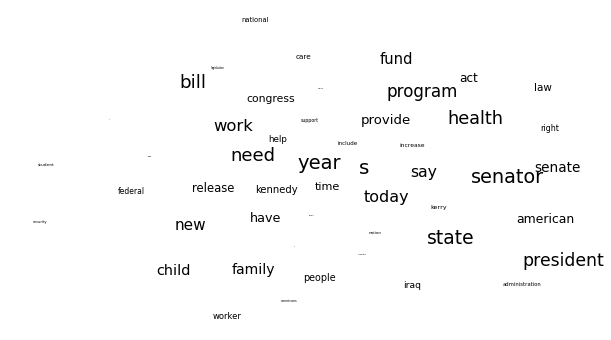

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

My visualization above puts ``said`` next to ``congress`` and ``bill`` near ``act``. ``health`` is beside ``care`` and ``national`` abuts ``security``.

# Chinese examples

In [ ]:
model=gensim.models.Word2Vec.load('/content/drive/MyDrive/1992embeddings_hs_new3.sg')

## analogy

King+man-Queen? A few examples based on a corpus of Chinese news. 

First, location analogy: **province -> capital**

In [ ]:
mm = model.most_similar(positive=[u'长沙',u'陕西'], negative=[u'湖南']) # Changsha + Shaanxi - Hunan
for m in mm:
    print(m[0],m[1])
    print("Xi'an")
    break

西安 0.36609965562820435
Xi'an


In [ ]:
mm = model.most_similar(positive=[u'广州',u'湖北'], negative=[u'广东']) # Guangzhou + Hubei - Guangdong
for m in mm:
    print(m[0],m[1])
    print("Wuhan")
    break

武汉 0.3677000403404236
Wuhan


Second, location analogy: **country -> capital**

In [ ]:
mm = model.most_similar(positive=[u'东京',u'美国'], negative=[u'日本']) # Tokyo + US - Japan
for m in mm:
    print(m[0],m[1])
    print("(Washington DC)")
    break

华盛顿 0.508813738822937
(Washington DC)


## similar words

In [ ]:
word = u'社会主义'  #socialism
ss = model.similar_by_word(word,topn=10)
print("the most similar words to " + word + " is: ")
for s in ss:
    print(s[0])
print("")

the most similar words to 社会主义 is: 
特色
市场经济
理论
建设
改革开放
马克思主义
党
经济体制
基本路线
现代化



In [ ]:
word = u'玉米'  # corn
ss = model.similar_by_word(word,topn=10)
print("the most similar words to " + word + " is: ")
for s in ss:
    print(s[0])
print("")

the most similar words to 玉米 is: 
小麦
水稻
作物
棉花
新品种
杂交
大豆
增产
栽培
农作物



## Adding more context - FastText

Since the original word2vec paper, there have followed a slew of word embedding related methods which innovate and build on them in many ways. One popular extension is FastText ([Bojanowski et al. 2017](https://arxiv.org/abs/1607.04606)), which uses sub-words to generate its vectors. Using subwords means that it is powerful in dealing with unknown words and sparse languages that otherwise have a rich morphological structure. These sub-words are incorporated into the previously skipgram and CBOW methods. For example, if the word is “which”, it is represented as the word itself along with a bag of constituent n-grams. If n=3, the representation looks like <wh, whi, hic, ich, ch>, and we learn a representation for each of these constituents, with the word “which” taking on the average value of these constituents. 

FastText can be used either via Gensim or the official package, and primarily has two functions - word representations, and text classification (Joulin et al. 2017). See below for code using the FastText package for playing with word representations, taken from their word representations tutorial (https://fasttext.cc/docs/en/unsupervised-tutorial.html).


### Representations with FastText

We will follow the instructions in the FastText tutorial to prepare our data, (Wikipedia). You can either follow the instructions on the page for setting the data, or download/copy it to drive it from this [Google Drive link](https://drive.google.com/file/d/12T3nNzf0a7tdhm1lVyfz9Ix9XVITFMCP/view?usp=sharing). 

In this example, we will be training a model - it is also possible to download and use the many pre-trained models.

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 3.0 MB/s 
  Using cached pybind11-2.9.1-py2.py3-none-any.whl (211 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3138120 sha256=5ce60097f63f45722653ac178f46d2be4b1cd64ebc861a013a92ad190a8fd4fd
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
# Replace with the path for where you have placed the 'fil9' file.
file_address = "/content/drive/MyDrive/fil9" 

In [ ]:
model = fasttext.train_unsupervised(file_address)

While FastText is running, the progress and estimated time to completion is shown on your screen. Once the training finishes, the model variable contains information on the trained model, which you can use for querying:



In [ ]:
model.words

It returns all words in the vocabulary, sorted by decreasing frequency. We can get the word vector by:



In [ ]:
model.get_word_vector("the")

In [ ]:
model.save_model("result/fil9.bin")

In [ ]:
# when we want to use the model again
# model = fasttext.load_model("result/fil9.bin")

Let's now print some vectors.

In [ ]:
[model.get_word_vector(x) for x in ["asparagus", "pidgey", "yellow"]]

A nice feature is that you can also query for words that did not appear in your data! Indeed words are represented by the sum of their substrings. As long as the unknown word is made of known substrings, there is a representation of it!

As an example let's try with a misspelled word:



In [ ]:
model.get_word_vector("enviroment")

In [ ]:
# Add FastText here

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec` and/or `fasttext`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why? 

<font color="red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

In [ ]:
df_read = pandas.read_pickle("/content/drive/MyDrive/2020-04_all.pkl")
df_sample = df_read.sample(frac =.10)
#df_sample = df_read[:100]

In [ ]:
df_sample

,Date,Company,Title,Article,System_GMT_Time,Display_ET_Time,Accession_Number
36024,20200407,\nCPIX\n,\nCumberland Pharma to Expand Availability of ...,\n\n \n By Stephen Nakrosis \n \n\n Shares ...,20200407T213154.945Z,"April 07, 2020 17:31 ET (21:31 GMT)",20200407011171
18690,20200403,\nLXFR\n,\nLuxfer Holdings Price Target Announced at $1...,\n\n \n\n Ratings actions from Benzinga: http...,20200403T151645.948Z,"April 03, 2020 11:16 ET (15:16 GMT)",20200403007606
98105,20200421,\nVPOR\n,"\nVapor Group Inc, Inst Holders, 1Q 2020 (VPOR)",\n\n \n\n The following table shows the large...,20200421T083104.908Z,"April 21, 2020 04:31 ET (08:31 GMT)",20200421003006
154767,20200429,None,\nPartisan Fight Looms Over Voting by Mail,\n\nBy Lindsay Wise and Alexa Corse \n\n W...,20200429T134502.911Z,"April 29, 2020 09:45 ET (13:45 GMT)",20200429009881
101178,20200421,\n0588.HK\n601588.SH\n,\nHK Bourse: Announcement From Beijing North S...,\n\n \n Following is the related link: \nht...,20200421T150209.525Z,"April 21, 2020 11:02 ET (15:02 GMT)",20200421008445
...,...,...,...,...,...,...,...
101772,20200421,\nWDO.T\nWDOFF\n,\nWesdome Gold Mines Ltd Price Target Raised t...,\n\n \n Ratings actions from Baystreet...,20200421T163314.018Z,"April 21, 2020 12:33 ET (16:33 GMT)",20200421009469
28545,20200406,\nZBH\n,\nPress Release: Zimmer Biomet Provides Update...,\n\noperating results and businesses generally...,20200406T200916.203Z,"April 06, 2020 16:09 ET (20:09 GMT)",20200406010379
62372,20200414,\nJNJ\n,"\nPandemic Boosts J&J's OTC Meds, Hurts Device...",\n\n 0840 ET - The coronavirus pandemic ha...,20200414T124035.741Z,"April 14, 2020 08:40 ET (12:40 GMT)",20200414005158
116703,20200423,\nELIS.FR\n,\nMoody's Affirms Elis' Ba2 Cfr; Outlook Chang...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200423T103437.076Z,"April 23, 2020 06:34 ET (10:34 GMT)",20200423006000


In [ ]:
#Apply our functions, notice each row is a list of lists now
df_sample['tokenized_sents'] = df_sample['Article'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
df_sample['normalized_sents'] = df_sample['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False, extra_stop=['|','$','+','=','sa','gmt']) for s in x])
#df_read['normalized_sents'] = df_read['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

df_sample[:100:10]

,Date,Company,Title,Article,System_GMT_Time,Display_ET_Time,Accession_Number,tokenized_sents,normalized_sents
36024,20200407,\nCPIX\n,\nCumberland Pharma to Expand Availability of ...,\n\n \n By Stephen Nakrosis \n \n\n Shares ...,20200407T213154.945Z,"April 07, 2020 17:31 ET (21:31 GMT)",20200407011171,"[[By, Stephen, Nakrosis, Shares, of, Cumberlan...","[[stephen, nakrosis, shares, cumberland, pharm..."
93735,20200420,None,\nNYSE American New 52-Week Highs And Lows,\n\n \nNew Highs 1 \n \nCOMPANY ...,20200420T172032.606Z,"April 20, 2020 13:20 ET (17:20 GMT)",20200420010109,"[[New, Highs, 1, COMPANY], [SYMBOL, HIGH], [VO...","[[new, highs, company], [symbol, high], [volum..."
87942,20200419,\nGOOG\nGOOGL\n,\nYouTube Spars With Auditor Over Transparency...,\n\nBy Suzanne Vranica \n\n Google wants t...,20200419T235050.326Z,"April 19, 2020 19:50 ET (23:50 GMT)",20200419002458,"[[By, Suzanne, Vranica, Google, wants, to, sub...","[[suzanne, vranica, google, wants, substantial..."
163699,20200430,None,"\nEurozone Economy Collapsed in 1Q, But 2Q See...",\n\n 1107 GMT - The eurozone economy colla...,20200430T110743.710Z,"April 30, 2020 07:07 ET (11:07 GMT)",20200430007206,"[[1107], [GMT], [The, eurozone, economy, colla...","[[], [], [eurozone, economy, collapsed, quarte..."
106975,20200422,\n1522.HK\n,\nHK Bourse: Results Announcement From China C...,"\n\n \n For full details, please click on t...",20200422T092521.993Z,"April 22, 2020 05:25 ET (09:25 GMT)",20200422004137,"[[For, full, details, please, click, on, the, ...","[[details, click, following, link, https://www..."
78848,20200416,\nSYNA\n,\nSynaptics Closes Transaction to Divest Mobil...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200416T200525.192Z,"April 16, 2020 16:05 ET (20:05 GMT)",20200416011372,"[[MORE, TO, FOLLOW], [Dow, Jones, Newswires, 2...","[[follow], [dow, jones, newswires, april, 16:0..."
169468,20200430,\nSEM\n,\nPress Release: Select Medical Holdings -4-,"\n\n (In thousands, unaudited) \n\n \n ...",20200430T203007.078Z,"April 30, 2020 16:30 ET (20:30 GMT)",20200430017676,"[[In, thousands, unaudited], [2019], [2020], [...","[[thousands, unaudited], [], [], [operating, a..."
96138,20200420,None,\nGlobal Equities Roundup: Market Talk,\n\n The latest Market Talks covering Equiti...,20200421T030635.183Z,"April 20, 2020 23:06 ET (03:06 GMT)",20200420014456,"[[The, latest, Market, Talks, covering, Equiti...","[[latest, market, talks, covering, equities], ..."
81547,20200417,\nLSI\n,\nLife Storage Is Maintained at Overweight by ...,\n\n \n\n Ratings actions from Benzinga: http...,20200417T090414.254Z,"April 17, 2020 05:04 ET (09:04 GMT)",20200417003416,"[[Ratings, actions, from, Benzinga, https://ww...","[[ratings, actions, benzinga, https://www.benz..."
70859,20200415,None,\nRail Traffic Slump Deepens -- Market Talk,\n\n 12:59 ET - The latest railroad carload s...,20200415T165931.334Z,"April 15, 2020 12:59 ET (16:59 GMT)",20200415008551,"[[12:59], [ET], [], [The, latest, railroad, ca...","[[12:59], [et], [], [latest, railroad, carload..."


In [ ]:
newsW2V = gensim.models.word2vec.Word2Vec(df_sample['normalized_sents'].sum(), sg=0)

In [ ]:
newsW2V.save("newsWORD2Vec")

In [ ]:
newsW2V['certain'][:10] #Shortening because it's very large

array([ 1.9412555 , -0.5349297 , -0.10705904, -1.4507744 ,  0.14227338,
        1.6020141 , -1.3038908 , -0.9622014 ,  0.37283978,  3.0530524 ],
      dtype=float32)

In [ ]:
# get the full matrix
newsW2V.wv.syn0

array([[-1.8405452e+00, -7.8758240e-01,  9.0959615e-01, ...,
         1.2466274e+00,  1.0931695e+00,  6.2605286e-01],
       [ 1.0607787e+00, -1.6280642e-01,  1.1648672e+00, ...,
         4.4337094e-01,  8.3641529e-01, -3.6778195e+00],
       [ 2.8975110e+00,  2.0885086e+00,  2.0722380e+00, ...,
         1.2905910e+00, -1.1529145e+00, -4.3635759e+00],
       ...,
       [ 5.2711420e-02,  4.5624692e-02, -6.2855922e-02, ...,
         5.5333696e-02,  5.3658184e-02, -3.1873174e-02],
       [-7.0521049e-02, -5.7651191e-03,  8.2300104e-02, ...,
        -6.4038381e-02, -5.6025051e-02,  1.5869616e-02],
       [-4.2570867e-02,  4.2740546e-02, -1.6668210e-02, ...,
         4.2888284e-02, -2.0970819e-03,  5.0354633e-02]], dtype=float32)

In [ ]:
# index2word lets you translate from the matrix to words
newsW2V.wv.index2word[10]

'information'

In [ ]:
newsW2V.most_similar('american')

[('america', 0.6981145143508911),
 ('north', 0.6925891637802124),
 ('nation', 0.6648157835006714),
 ('carolina', 0.6399633288383484),
 ('biggest', 0.6183573007583618),
 ('peoples', 0.6181856989860535),
 ('star', 0.6084784269332886),
 ('goonyella', 0.5981864929199219),
 ('latin', 0.5881534218788147),
 ('airlines', 0.5861483812332153)]

In [ ]:
newsW2V.most_similar('chinese')

[('china', 0.5811998844146729),
 ('major', 0.5694969892501831),
 ('official', 0.5601835250854492),
 ('u.k', 0.5601232051849365),
 ('quoting', 0.5324483513832092),
 ('began', 0.5292764902114868),
 ('came', 0.517539918422699),
 ('italian', 0.5161000490188599),
 ('reopen', 0.5127115845680237),
 ('push', 0.5118409991264343)]

In [ ]:
newsW2V.most_similar('price')

[('prices', 0.6424334645271301),
 ('priced', 0.5483330488204956),
 ('pricing', 0.5454660058021545),
 ('valuation', 0.5109620094299316),
 ('dilution', 0.49902307987213135),
 ('volume', 0.4900185465812683),
 ('rolling', 0.48655861616134644),
 ('repurchase', 0.47249835729599),
 ('pence', 0.4718470573425293),
 ('selling', 0.46539366245269775)]

In [ ]:
newsW2V.most_similar('stock')

[('share', 0.6127921342849731),
 ('onechicago', 0.5869578719139099),
 ('shares', 0.5372310876846313),
 ('traded', 0.5110514163970947),
 ('børs', 0.5015484094619751),
 ('ipo', 0.47408249974250793),
 ('repurchase', 0.457888126373291),
 ('intercontinental', 0.457663893699646),
 ('adss', 0.4549458622932434),
 ('cancellation', 0.4536116421222687)]

In [ ]:
newsW2V.doesnt_match(['price','unemployment','business','coronavirus'])

'business'

In [ ]:
newsW2V.most_similar(positive=['price', 'increase'], negative = ['bad'])

[('volume', 0.5937436819076538),
 ('approximately', 0.5439069271087646),
 ('valuation', 0.533974826335907),
 ('maximum', 0.5280010104179382),
 ('i.e.', 0.5210672616958618),
 ('reduction', 0.5191321969032288),
 ('repurchase', 0.5160710215568542),
 ('percent', 0.5135224461555481),
 ('aggregate', 0.5092470049858093),
 ('representing', 0.5092204809188843)]

In [ ]:
newsW2V.save("samplenewsWORD2Vec")

In [ ]:
numWords = 50
targetWords = newsW2V.wv.index2word[:numWords]

In [ ]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(newsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-1.8405452 , -0.7875824 ,  0.90959615, ...,  1.2466274 ,
         1.0931695 ,  0.62605286],
       [ 1.0607787 , -0.16280642,  1.1648672 , ...,  0.44337094,
         0.8364153 , -3.6778195 ],
       [ 2.897511  ,  2.0885086 ,  2.072238  , ...,  1.290591  ,
        -1.1529145 , -4.363576  ],
       ...,
       [-1.0775971 ,  0.54266393, -1.1202517 , ...,  1.8020456 ,
        -0.60987496,  0.2520266 ],
       [ 2.6232853 , -1.2839568 , -2.6463568 , ..., -0.35541648,
        -0.17329597, -2.6306832 ],
       [-0.04718248,  0.31484613,  0.08892114, ...,  0.310857  ,
         0.40299508, -0.72320366]], dtype=float32)

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

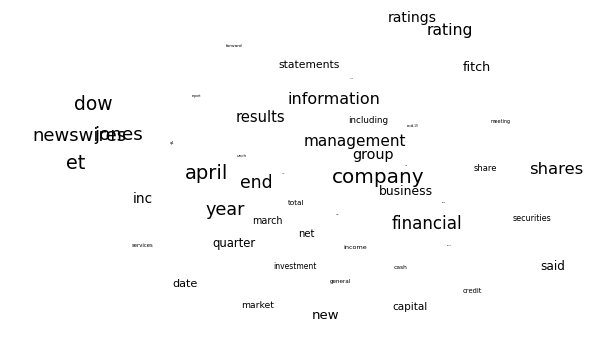

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

Pirce + increase - bad = repurchase, This is to say repurchase to increase is price to bad. While this is conterintuitive in financial sense, since increasing repurchase would make stock price goes up. 

# Doc2Vec

Instead of just looking at just how words embed within in the space, we can look at how the different documents relate to each other within the space. First lets load our data--abstracts of most U.S. physics papers from the 1950s.

In [ ]:
apsDF = pandas.read_csv('/content/drive/MyDrive/APSabstracts1950s.csv', index_col = 0)
apsDF[:10]

,copyrightYear,doi,abstract
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...
5,1951,10.1103/RevModPhys.23.311,A brief account is given of Dyson's proof of t...
6,1951,10.1103/RevModPhys.23.315,A systematics is given of all transitions for ...
7,1951,10.1103/RevModPhys.23.322,A systematics of the -transitions of even A nu...
8,1951,10.1103/RevModPhys.23.328,The available experiments on the absorption sp...
9,1952,10.1103/RevModPhys.24.108,The classical theory of the dynamics of viscou...


We will load these as documents into Word2Vec, but first we need to normalize and pick some tags.

In [ ]:
keywords = ['photomagnetoelectric', 'quantum', 'boltzmann', 'proton', 'positron', 'feynman', 'classical', 'relativity']

In [ ]:
apsDF['tokenized_words'] = apsDF['abstract'].apply(lambda x: lucem_illud.word_tokenize(x))
apsDF['normalized_words'] = apsDF['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

In [ ]:
apsDF[:10]

,copyrightYear,doi,abstract,tokenized_words,normalized_words,TaggedAbstracts
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...,"[A, summarizing, account, is, given, of, the, ...","[summarizing, account, given, research, barium...","([summarizing, account, given, research, bariu..."
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...,"[New, tables, of, coulomb, functions, are, pre...","[new, tables, coulomb, functions, presented, i...","([new, tables, coulomb, functions, presented, ..."
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...,"[Ionization, by, electron, impact, in, diatomi...","[ionization, electron, impact, diatomic, gases...","([ionization, electron, impact, diatomic, gase..."
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...,"[It, is, shown, that, the, conductivity, in, t...","[shown, conductivity, ohmic, cuprous, oxide, l...","([shown, conductivity, ohmic, cuprous, oxide, ..."
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...,"[The, factorization, method, is, an, operation...","[factorization, method, operational, procedure...","([factorization, method, operational, procedur..."
5,1951,10.1103/RevModPhys.23.311,A brief account is given of Dyson's proof of t...,"[A, brief, account, is, given, of, Dyson, 's, ...","[brief, account, given, dyson, proof, finitene...","([brief, account, given, dyson, proof, finiten..."
6,1951,10.1103/RevModPhys.23.315,A systematics is given of all transitions for ...,"[A, systematics, is, given, of, all, transitio...","[systematics, given, transitions, odd, nuclei,...","([systematics, given, transitions, odd, nuclei..."
7,1951,10.1103/RevModPhys.23.322,A systematics of the -transitions of even A nu...,"[A, systematics, of, the, -transitions, of, ev...","[systematics, -transitions, nuclei, given, int...","([systematics, -transitions, nuclei, given, in..."
8,1951,10.1103/RevModPhys.23.328,The available experiments on the absorption sp...,"[The, available, experiments, on, the, absorpt...","[available, experiments, absorption, spectra, ...","([available, experiments, absorption, spectra,..."
9,1952,10.1103/RevModPhys.24.108,The classical theory of the dynamics of viscou...,"[The, classical, theory, of, the, dynamics, of...","[classical, theory, dynamics, viscous, fluids,...","([classical, theory, dynamics, viscous, fluids..."


In [ ]:
taggedDocs = []
for index, row in apsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['copyrightYear'])
    docKeywords.append(row['doi']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
apsDF['TaggedAbstracts'] = taggedDocs

In [ ]:
apsDF

,copyrightYear,doi,abstract,tokenized_words,normalized_words,TaggedAbstracts
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...,"[A, summarizing, account, is, given, of, the, ...","[summarizing, account, given, research, barium...","([summarizing, account, given, research, bariu..."
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...,"[New, tables, of, coulomb, functions, are, pre...","[new, tables, coulomb, functions, presented, i...","([new, tables, coulomb, functions, presented, ..."
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...,"[Ionization, by, electron, impact, in, diatomi...","[ionization, electron, impact, diatomic, gases...","([ionization, electron, impact, diatomic, gase..."
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...,"[It, is, shown, that, the, conductivity, in, t...","[shown, conductivity, ohmic, cuprous, oxide, l...","([shown, conductivity, ohmic, cuprous, oxide, ..."
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...,"[The, factorization, method, is, an, operation...","[factorization, method, operational, procedure...","([factorization, method, operational, procedur..."
...,...,...,...,...,...,...
9704,1955,10.1103/PhysRev.99.98,Chemical separation of the products resulting ...,"[Chemical, separation, of, the, products, resu...","[chemical, separation, products, resulting, ph...","([chemical, separation, products, resulting, p..."
9705,1955,10.1103/PhysRev.99.986,The generalized Kramers-Kronig dispersion rela...,"[The, generalized, Kramers, Kronig, dispersion...","[generalized, kramers, kronig, dispersion, rel...","([generalized, kramers, kronig, dispersion, re..."
9706,1955,10.1103/PhysRev.99.989,The question is asked whether the lowest order...,"[The, question, is, asked, whether, the, lowes...","[question, asked, lowest, order, tamm, dancoff...","([question, asked, lowest, order, tamm, dancof..."
9707,1955,10.1103/PhysRev.99.996,An explicit formula for the scattering spin ma...,"[An, explicit, formula, for, the, scattering, ...","[explicit, formula, scattering, spin, matrix, ...","([explicit, formula, scattering, spin, matrix,..."


Now we can train a Doc2Vec model:

In [ ]:
apsD2V = gensim.models.doc2vec.Doc2Vec(apsDF['TaggedAbstracts'], size = 100) #Limiting to 100 dimensions

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


We can get vectors for the tags/documents, just as we did with words. Documents are actually the centroids (high dimensional average points) of their words. 

In [ ]:
apsD2V.docvecs[1952]

array([-0.21196003, -0.20226948,  0.1849106 , -0.02641914, -0.18002558,
        0.9952869 , -0.46393135,  0.45951298, -1.2995827 , -0.9792089 ,
       -1.7150936 , -0.90051055, -0.6406101 , -0.4415425 , -0.22921093,
       -0.47229284, -0.9747319 ,  1.6075959 ,  0.45921838, -1.033607  ,
       -0.86985934, -1.1743226 , -0.3564674 ,  0.72077733, -0.41193008,
        0.755428  ,  0.1511335 , -0.11502341, -0.15791045,  0.26452604,
        1.0478908 , -1.3781773 , -0.47578818,  1.0055786 , -0.6112965 ,
        1.4509821 , -1.4734648 , -0.5878605 , -1.6734931 ,  0.17110541,
        0.13245107,  0.6192972 ,  0.3380004 ,  0.7734389 ,  0.45405376,
        0.7645874 , -0.2868263 ,  0.33070597,  1.5805745 , -0.4659213 ,
       -1.3260145 , -1.0921373 ,  0.20031394, -1.7003406 ,  0.52061796,
        1.3128217 , -0.46763986,  0.4270143 ,  1.5713798 , -1.2161646 ,
       -1.149698  , -0.6098318 ,  1.1768997 , -1.3950645 , -1.092555  ,
        0.6551185 , -0.9026476 , -0.9204173 , -0.87758565,  1.36

The words can still be accessed in the same way:

In [ ]:
apsD2V['atom']

array([ 0.37201545,  0.7122063 , -0.6772447 ,  0.5187503 ,  0.05364195,
        0.8188632 , -0.00354335, -0.14917253, -0.90279716,  0.31379363,
       -1.2675624 , -0.53311336,  0.23372385, -0.31783134,  0.39629337,
       -1.1752614 , -0.5953377 ,  0.5229063 , -0.32534394, -0.64476395,
       -0.15733415, -0.6260033 , -0.3264325 , -0.52980816, -1.2010491 ,
       -0.02905217,  0.10836459, -0.6010488 ,  1.1451383 , -0.4376751 ,
        0.4730777 , -0.20259412,  0.24809217, -0.69605756,  0.23748647,
        0.19980392, -0.36335653, -0.8378829 , -0.6374762 , -0.7654375 ,
        0.1095077 , -0.91383624,  0.06455082,  0.6356875 ,  0.5120424 ,
        1.5179749 ,  0.4228719 ,  0.20372894,  0.8502272 , -0.23397563,
       -0.3070361 ,  0.79378337,  0.6941719 , -0.16809432, -0.05671002,
       -0.1052795 , -0.59371465,  0.5089897 ,  0.15298302, -0.8256386 ,
       -0.82280815,  0.26851967,  0.89248776, -0.3658541 , -0.01587184,
       -0.40297496, -0.38431677, -0.92814296,  0.32460812, -0.72

We can still use the ``most_similar`` command to perform simple semantic equations:

In [ ]:
apsD2V.most_similar(positive = ['atom','electrons'], negative = ['electron'], topn = 1)

[('holes', 0.8057165741920471)]

This is interesting. **Electron** is to **electrons** as **atom** is to **atoms**. Another way to understand this, developed below is: **electrons - electron** induces a singular to plural dimension, so when we subtract **electron** from **atom** and add **electrons**, we get **atoms**! 

In [ ]:
apsD2V.most_similar(positive = ['einstein','law'], negative = ['equation'], topn = 1)

[('fluid', 0.934807300567627)]

In other words **Einstein** minus **equation** plus **law** equals **Meissner**--Walthur Meissner studied mechanical engineering and physics ... and was more likely to produce a "law" than a "equation", like the Meissner effect, the damping of the magnetic field in superconductors. If we built our word-embedding with a bigger corpus like the entire arXiv, a massive repository of physics preprints, we would see many more such relationships like **gravity - Newton + Einstein = relativity**.

We can also compute all of these *by hand*--explicitly wth vector algebra: 

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(apsD2V['electron'].reshape(1,-1), apsD2V['positron'].reshape(1,-1))
#We reorient the vectors with .reshape(1, -1) so that they can be computed without a warning in sklearn

array([[0.6237717]], dtype=float32)

In the doc2vec model, the documents have vectors just as the words do, so that we can compare documents with each other and also with words (similar to how a search engine locates a webpage with a query). First, we will calculate the distance between a word and documents in the dataset:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron'] ], topn=5 )

[('10.1103/PhysRev.109.1052', 0.6384949684143066),
 ('10.1103/PhysRev.100.1646', 0.6329227685928345),
 ('10.1103/PhysRev.113.1545', 0.6215622425079346),
 ('10.1103/PhysRev.110.630', 0.6113729476928711),
 ('10.1103/PhysRev.113.479', 0.6076899766921997)]

If we search for the first of these on the web (these are doi codes), we find the following...a pretty good match:

In [ ]:
from IPython.display import Image
Image("../data/PhysRev.98.875.jpg", width=1000, height=1000)

Now let's go the other way around and find words most similar to this document:

In [ ]:
apsD2V.most_similar( [ apsD2V.docvecs['10.1103/PhysRev.98.875'] ], topn=5) 

[('amounting', 0.7705944776535034),
 ('discontinuously', 0.7690105438232422),
 ('attained', 0.7590419054031372),
 ('lorenz', 0.7501641511917114),
 ('raise', 0.7289189100265503)]

We can even look for documents most like a query composed of multiple words:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron']+apsD2V['positron']+apsD2V['neutron']], topn=5 )

[('10.1103/PhysRev.85.1012', 0.761059045791626),
 ('10.1103/PhysRev.102.805', 0.7434149980545044),
 ('10.1103/PhysRev.93.406', 0.7353998422622681),
 ('10.1103/PhysRev.85.120', 0.7214193344116211),
 ('10.1103/PhysRev.89.1165', 0.7189117670059204)]

Now let's plot some words and documents against one another with a heatmap:

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

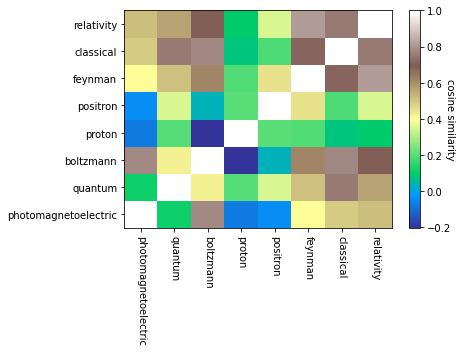

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

Now let's look at a heatmap of similarities between the first ten documents in the corpus:

In [ ]:
targetDocs = apsDF['doi'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

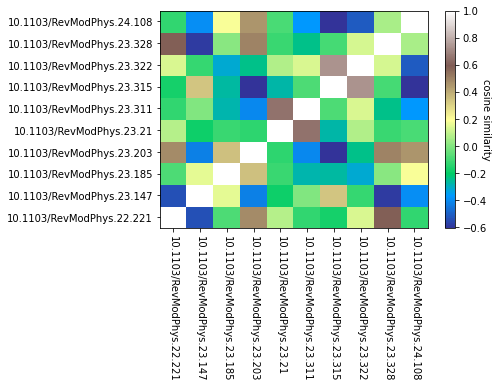

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Now let's look at a heatmap of similarities between the first ten documents and our keywords:

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

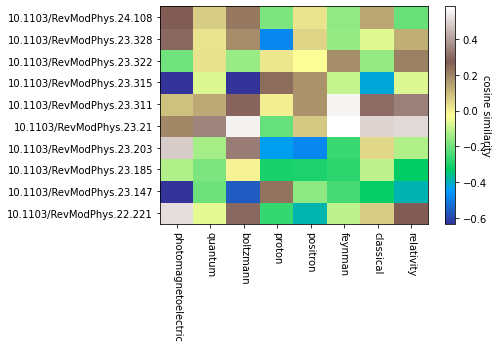

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

We will save the model in case we would like to use it again.

In [ ]:
apsD2V.save('apsW2V')

We can later load it:

In [ ]:
#apsD2V = gensim.models.word2vec.Word2Vec.load('data/apsW2V')

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

In [ ]:
df_read = pandas.read_pickle("/content/drive/MyDrive/2020-04_all.pkl")
df_sample = df_read.sample(frac =.10)

In [ ]:
df_sample

,Date,Company,Title,Article,System_GMT_Time,Display_ET_Time,Accession_Number
158480,20200429,None,\nNew York Closing Stocks,\n\n \nCompany Symbol ...,20200429T203717.988Z,"April 29, 2020 16:37 ET (20:37 GMT)",20200429016494
93098,20200420,\nFBSS\n,\nFauquier Bankshares Noninterest Income $1.3 ...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200420T153158.501Z,"April 20, 2020 11:31 ET (15:31 GMT)",20200420008920
37942,20200408,\nDWS.XE\n,\nDWS Raised to Outperform From Neutral by Cre...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200408T082913.365Z,"April 08, 2020 04:29 ET (08:29 GMT)",20200408002588
49414,20200409,\nMF.FR\n,\nPass & Seymour Recalls Comml-Grade Electrica...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200409T191437.798Z,"April 09, 2020 15:14 ET (19:14 GMT)",20200409011232
5892,20200401,None,\nMaterials Down After Stark Warning From Trum...,\n\n Producers of metals and other raw materi...,20200401T201618.599Z,"April 01, 2020 16:16 ET (20:16 GMT)",20200401010880
...,...,...,...,...,...,...,...
47735,20200409,\nBX\n,\nBlackstone Group Price Target Cut to $43.00/...,\n\n \n\n Ratings actions from Benzinga: http...,20200409T141110.562Z,"April 09, 2020 10:11 ET (14:11 GMT)",20200409008441
138276,20200427,\nCR\n,\nCrane Co 1Q Adj EPS $1.15 >CR,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200427T210100.436Z,"April 27, 2020 17:01 ET (21:01 GMT)",20200427013387
40677,20200408,\nFLUO.AKT\n,\nFluoguide: Ordinary General Meeting,\n\n \nTo the shareholders of FluoGuide A/S \n...,20200408T150009.661Z,"April 08, 2020 11:00 ET (15:00 GMT)",20200408007661
98490,20200421,\nAAPL\n,\nPress Release: Apple Services Now Available ...,\n\nApple Services Now Available in More Count...,20200421T093852.384Z,"April 21, 2020 05:38 ET (09:38 GMT)",20200421003710


In [ ]:
keywords = ['china', 'conference', 'economy', 'trading', 'companies', 'earnings', 'alpha', 'dividend','analyst']

In [ ]:
df_sample['tokenized_words'] = df_sample['Article'].apply(lambda x: lucem_illud.word_tokenize(x))
df_sample['normalized_words'] = df_sample['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False, extra_stop=['|','$','-','+','=','sa','gmt']))

In [ ]:
taggedDocs = []
for index, row in df_sample.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['Date'])
    docKeywords.append(row['Accession_Number']) #This lets us extract individual documnets since accession_number's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
df_sample['TaggedArticles'] = taggedDocs

In [ ]:
df_sample.head()

,Date,Company,Title,Article,System_GMT_Time,Display_ET_Time,Accession_Number,tokenized_words,normalized_words,TaggedArticles
158480,20200429,None,\nNew York Closing Stocks,\n\n \nCompany Symbol ...,20200429T203717.988Z,"April 29, 2020 16:37 ET (20:37 GMT)",20200429016494,"[Company, Symbol, Close, NetChange, Volume, Af...","[company, symbol, close, netchange, volume, af...","([company, symbol, close, netchange, volume, a..."
93098,20200420,\nFBSS\n,\nFauquier Bankshares Noninterest Income $1.3 ...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200420T153158.501Z,"April 20, 2020 11:31 ET (15:31 GMT)",20200420008920,"[MORE, TO, FOLLOW, Dow, Jones, Newswires, 212,...","[follow, dow, jones, newswires, april, 11:31, ...","([follow, dow, jones, newswires, april, 11:31,..."
37942,20200408,\nDWS.XE\n,\nDWS Raised to Outperform From Neutral by Cre...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200408T082913.365Z,"April 08, 2020 04:29 ET (08:29 GMT)",20200408002588,"[MORE, TO, FOLLOW, Dow, Jones, Newswires, Apri...","[follow, dow, jones, newswires, april, 04:29, ...","([follow, dow, jones, newswires, april, 04:29,..."
49414,20200409,\nMF.FR\n,\nPass & Seymour Recalls Comml-Grade Electrica...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200409T191437.798Z,"April 09, 2020 15:14 ET (19:14 GMT)",20200409011232,"[MORE, TO, FOLLOW, Dow, Jones, Newswires, 212,...","[follow, dow, jones, newswires, april, 15:14, ...","([follow, dow, jones, newswires, april, 15:14,..."
5892,20200401,None,\nMaterials Down After Stark Warning From Trum...,\n\n Producers of metals and other raw materi...,20200401T201618.599Z,"April 01, 2020 16:16 ET (20:16 GMT)",20200401010880,"[Producers, of, metals, and, other, raw, mater...","[producers, metals, raw, materials, fell, shar...","([producers, metals, raw, materials, fell, sha..."


In [ ]:
sampleD2V = gensim.models.doc2vec.Doc2Vec(df_sample['TaggedArticles'], size = 100) #Limiting to 100 dimensions

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [ ]:
sampleD2V.docvecs[keywords[1]]

array([-1.1046935 , -3.3147058 , -2.1681926 ,  3.0646784 , -1.5390177 ,
        3.6890776 ,  6.3071585 , -5.2208996 , -1.6209902 ,  1.670031  ,
        3.2180386 , -4.294821  ,  5.634271  , -4.9064126 , -1.470415  ,
       -2.3729718 , -1.3421544 , -1.5512012 , -2.3657405 , -2.1855164 ,
       -2.10096   ,  3.4623294 , -2.425783  ,  4.7009816 , -2.0322247 ,
       -2.1787407 ,  0.49150336, -5.886594  ,  0.494933  , -1.9255307 ,
        0.48123926, -4.6853075 ,  0.6428353 , -4.107432  ,  0.94158745,
        0.6850424 ,  1.6820681 ,  2.7651684 ,  0.09583386, -0.33423215,
        3.7052338 ,  5.341895  , -0.02744148, -5.546577  , -1.0640426 ,
       -1.0399228 , -4.842043  , -0.11660116, -1.2366732 ,  0.36307424,
       -2.4174964 , -2.0514915 ,  1.9379759 ,  7.0092545 , -0.073379  ,
        3.495588  ,  0.87912893,  1.2108982 , -0.9602914 ,  0.34108052,
        1.7008626 , -3.5772    , -4.6095514 ,  1.3827869 ,  2.7050586 ,
       -2.9123433 , -4.517482  ,  1.2372051 ,  0.47966057,  2.50

In [ ]:
# what's the difference between vectors of tags and words?
sampleD2V['conference']

array([-2.8046026 ,  3.1104074 , -1.2627892 ,  1.4635799 ,  1.5170612 ,
       -0.3904812 , -0.61137825, -0.64469475,  1.6396465 , -0.06944086,
        3.1385486 ,  4.0868006 , -0.8001677 , -0.12991787, -0.39277983,
       -3.4274604 ,  0.54735154, -3.1407826 , -2.825534  ,  0.2821862 ,
       -0.8553468 , -0.27851686,  2.0117168 ,  0.5443582 , -0.90797675,
       -2.3644893 , -0.8901564 , -3.3325992 , -0.8375482 ,  1.7071177 ,
       -0.04361149, -4.7409015 , -3.147024  , -1.2517624 , -0.42808142,
       -0.92954814,  3.7872455 ,  3.522927  , -0.74144906, -0.11543269,
        2.0621092 ,  0.44315052,  0.4559619 , -1.4775751 , -1.4225872 ,
       -1.2922503 , -4.529065  , -1.1448467 , -2.9166012 , -0.81733036,
        0.92920107, -3.4166298 ,  3.2008998 ,  2.125632  , -3.0110352 ,
       -1.5648166 , -1.3883517 ,  1.1670054 ,  4.60263   , -0.5712055 ,
        2.4123719 , -2.6030877 , -0.87714976, -0.7513293 ,  1.3429775 ,
       -2.5602527 , -0.02289909,  3.6867278 ,  2.2186592 , -0.10

In [ ]:
sampleD2V.most_similar(positive = ['conference','china'], negative = ['earnings'], topn = 1)

[('republic', 0.5472062230110168)]

In [ ]:
sampleD2V.most_similar(positive = ['sales','company'], negative = ['earnings'], topn = 1)

[('operation', 0.43478769063949585)]

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(sampleD2V['earnings'].reshape(1,-1), sampleD2V['good'].reshape(1,-1))

array([[0.12162185]], dtype=float32)

In [ ]:
sampleD2V.docvecs.most_similar([ sampleD2V['negative'] ], topn=5 )

[('20200408004457', 0.6947150826454163),
 ('20200407009021', 0.6876441836357117),
 ('20200420009915', 0.6776849031448364),
 ('20200422011678', 0.6147761344909668),
 ('20200403011807', 0.6134427785873413)]

In [ ]:
df_sample.loc[df_sample['Accession_Number'] == '20200403011807'].iloc[0,3]

"\n\n \n \nThe following is a press release from Moody's: \n \n Moody's Downgrades Belk Cfr To Caa1; Outlook Remains Negative \n \n http://www.moodys.com/page/viewresearchdoc.aspx?docid=PR_421785&WT.mc_id=AMRG93Sm9uZXNOZXdzcm9vbV9TQl9OUl9DVl9SYXRpbmdfTmV3c19BbGxfRW5n20200403_PR_421785 \n \n \n\n  (END) Dow Jones Newswires\n\n  April 03, 2020 16:46 ET (20:46 GMT)\n"

In [ ]:
# find words most similar to this document
sampleD2V.most_similar( [ sampleD2V.docvecs['20200408004457'] ], topn=5) 

[('end-2020', 0.7325364947319031),
 ('unmitigated', 0.7238838076591492),
 ('--the', 0.7126868963241577),
 ('weakening', 0.7111892700195312),
 ('worsening', 0.710408091545105)]

In [ ]:
# look for documents most like a query composed of multiple words
sampleD2V.docvecs.most_similar([sampleD2V['earnings']+sampleD2V['announcement']+sampleD2V['uncertain']], topn=5 )

[('20200420002254', 0.6348022222518921),
 ('20200401003992', 0.6055668592453003),
 ('20200429016197', 0.5982871055603027),
 ('20200402006328', 0.5981607437133789),
 ('20200429015154', 0.5970421433448792)]

In [ ]:
df_read.loc[df_read['Accession_Number'] == '20200401003992'].iloc[0,3]

'\n\n \n DGAP-News: Axel Springer SE / Key word(s): Delisting \nDelisting of the Axel Springer SE shares from the Frankfurt Stock Exchange \nat the end of April 6, 2020 \n \n2020-04-01 / 12:56 \nThe issuer is solely responsible for the content of this announcement. \n \nThe Frankfurt Stock Exchange has informed Axel Springer SE today that its \ndelisting application has been approved. The Axel Springer SE shares will be \ndelisted from the regulated market of the Frankfurt Stock Exchange in \naccordance with the stock exchange regulations of the Frankfurt Stock \nExchange at the end of April 6, 2020. Thereafter, the Axel Springer SE \nshares can no longer be traded on the Frankfurt Stock Exchange. Axel \nSpringer SE assumes that the stock exchanges in Berlin, Düsseldorf, Hamburg, \nHanover, Munich, Stuttgart as well as Tradegate Exchange will end the \ninclusion of the Axel Springer SE shares in the open market likely in close \ntemporal proximity with the delisting from the Frankfurt 

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = sampleD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, sampleD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

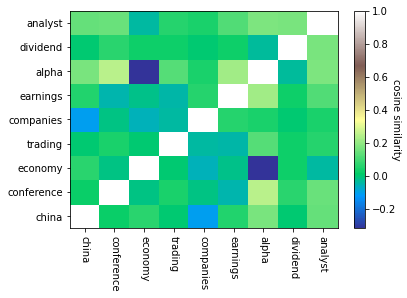

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [ ]:
# heatmap of similarities between the first ten documents in the corpus
targetDocs = df_sample['Accession_Number'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = sampleD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, sampleD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

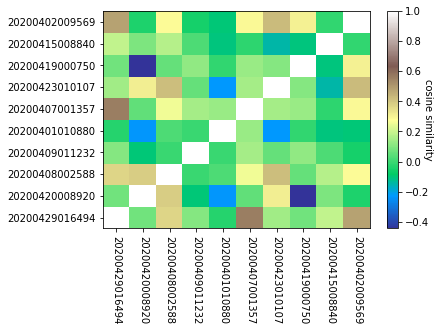

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
# a heatmap of similarities between the first ten documents and our keywords
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = sampleD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, sampleD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

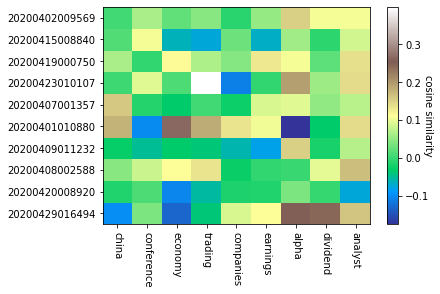

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

We can find that there is a significant similarity between the news with accession number 20200423010107 and trading, which indicates this news is primarily about trading.

In [ ]:
df_read.loc[df_read['Accession_Number'] == '20200423010107'].iloc[0,3]
#df_read.loc[df_read['Accession_Number'] == '20200429016494'].iloc[0,3]#

'\n\n \n DGAP Voting Rights Announcement: JOST Werke AG \nJOST Werke AG: Release according to Article 40, Section 1 of the WpHG [the \nGerman Securities Trading Act] with the objective of Europe-wide \ndistribution \n \n2020-04-23 / 16:15 \nDissemination of a Voting Rights Announcement transmitted by DGAP - a \nservice of EQS Group AG. \nThe issuer is solely responsible for the content of this announcement. \n \n*Notification of Major Holdings* \n \n*1. Details of issuer* \n+------------------------------+--------------------+ \n|Name:                         |JOST Werke AG       | \n+------------------------------+--------------------+ \n|Street:                       |Siemensstraße 2| \n+------------------------------+--------------------+ \n|Postal code:                  |63263               | \n+------------------------------+--------------------+ \n|City:                         |Neu-Isenburg        | \n|                              |Germany             | \n+---------------------

In [ ]:
sampleD2V.save('sampleD2V')

In [ ]:
#apsD2V = gensim.models.word2vec.Word2Vec.load('data/apsW2V')

# Projection

We can also project word vectors to an arbitray semantic dimension. To demonstrate this possibility, let's first load a model trained with New York Times news articles. 

In [ ]:
nytimes_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/nytimes_cbow.reduced.txt')

First we can visualize with dimension reduction

In [ ]:
#words to create dimensions
tnytTargetWords = ['man','him','he', 'woman', 'her', 'she', 'black','blacks','African', 'white', 'whites', 'Caucasian', 'rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest', 'cheap', 'inexpensive']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse", "steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry", "basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(nytimes_model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.343139, -0.117117, -0.50773 , ..., -0.995696,  0.921299,
         0.943769],
       [-0.362909, -0.263528,  0.032661, ..., -0.043032, -0.178965,
         0.353556],
       [-0.70167 , -0.344525, -0.320714, ...,  0.009001,  0.11055 ,
         0.751077],
       ...,
       [-2.391626, -1.90143 ,  1.031182, ...,  2.947464,  1.01588 ,
         2.00033 ],
       [-2.432387, -1.161415,  1.060064, ...,  4.402381,  0.500471,
         1.644596],
       [ 0.981931,  0.628094, -0.747547, ...,  1.612927,  1.148063,
         1.063776]], dtype=float32)

In [ ]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNYT = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

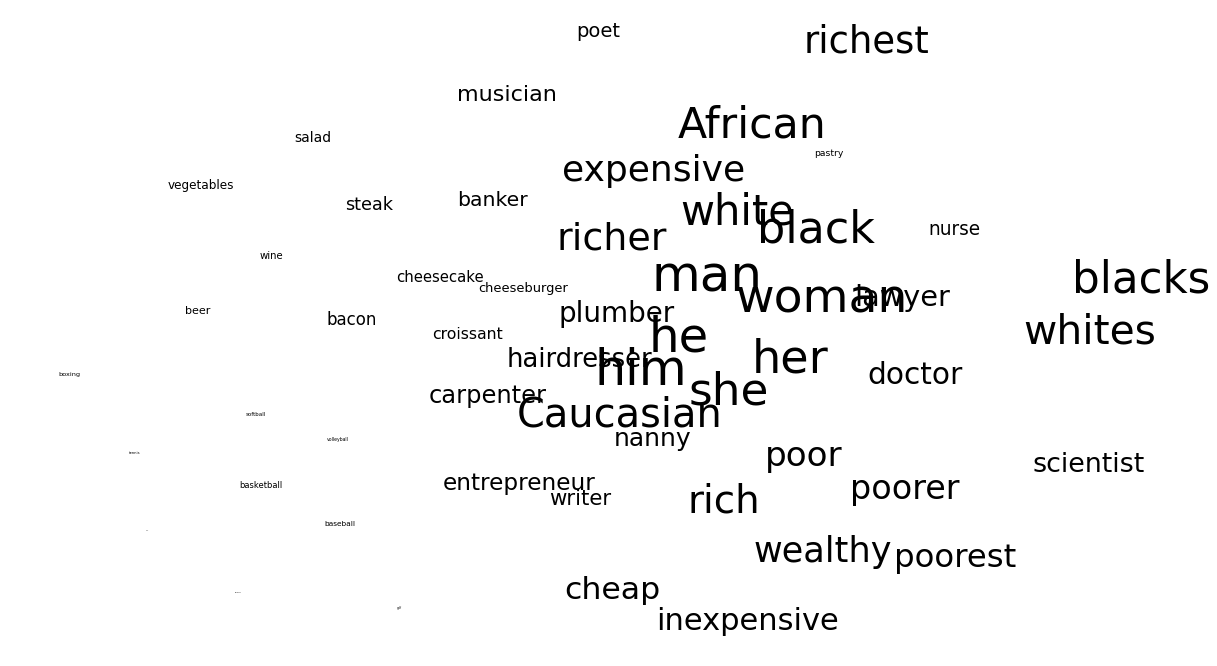

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions. 

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [ ]:
Gender = dimension(nytimes_model, ['man','him','he'], ['woman', 'her', 'she'])
Race = dimension(nytimes_model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
Class = dimension(nytimes_model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

Here we have some words.

In [ ]:
Occupations = ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"]

Sports  = ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]

Define a function to project words in a word list to each of the three dimensions.

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

Get the projections.

In [ ]:
OCCdf = makeDF(nytimes_model, Occupations) 
Fooddf = makeDF(nytimes_model, Foods)
Sportsdf = makeDF(nytimes_model, Sports)
OCCdf

,gender,race,class
doctor,-0.058048,-0.098297,-0.101023
lawyer,0.021787,0.014264,0.052377
plumber,0.038784,-0.082154,-0.003232
scientist,0.053595,-0.107106,0.017319
hairdresser,-0.364141,-0.160411,-0.027526
nanny,-0.220270,-0.135943,-0.008819
carpenter,-0.063229,-0.102722,0.017506
entrepreneur,0.033817,-0.116234,0.177146
musician,-0.079396,-0.080416,0.012577
writer,-0.101106,-0.119433,0.125964


Define some useful functions for plotting.

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

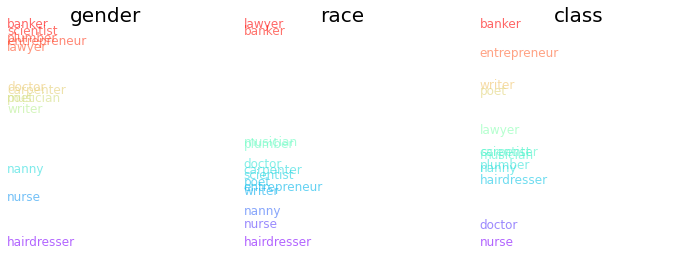

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

Foods:

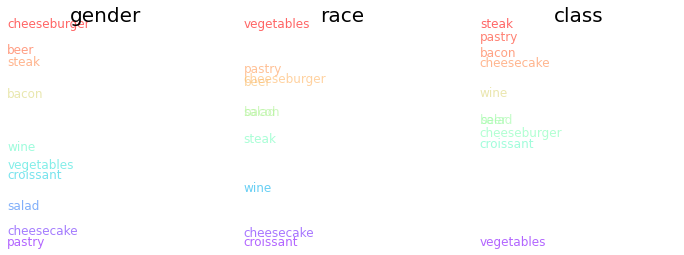

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

Sports:

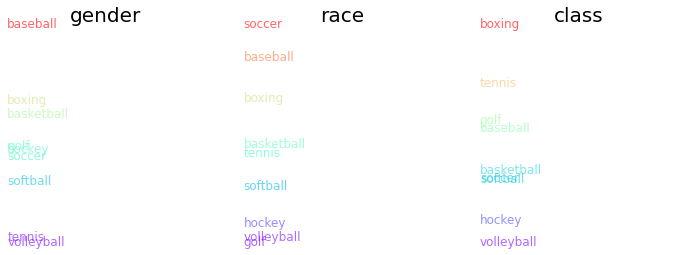

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<font color="red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

In [ ]:
newsWORD2Vec = gensim.models.word2vec.Word2Vec.load('/content/newsWORD2Vec')

In [ ]:
newsTargetWords = ['good','bad','positive', 'negative', 'increase', 'decrease', 'certain','uncertain','volatile', 'smooth', 'optimistic']
#words we will be mapping
newsTargetWords += ["news","china","trump","trade","economy", "company","earnings","report","conference","dividend", "analyst","forecast",'stock']


wordsSubMatrix = []
for word in newsTargetWords:
    wordsSubMatrix.append(newsWORD2Vec[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 20).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNews = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

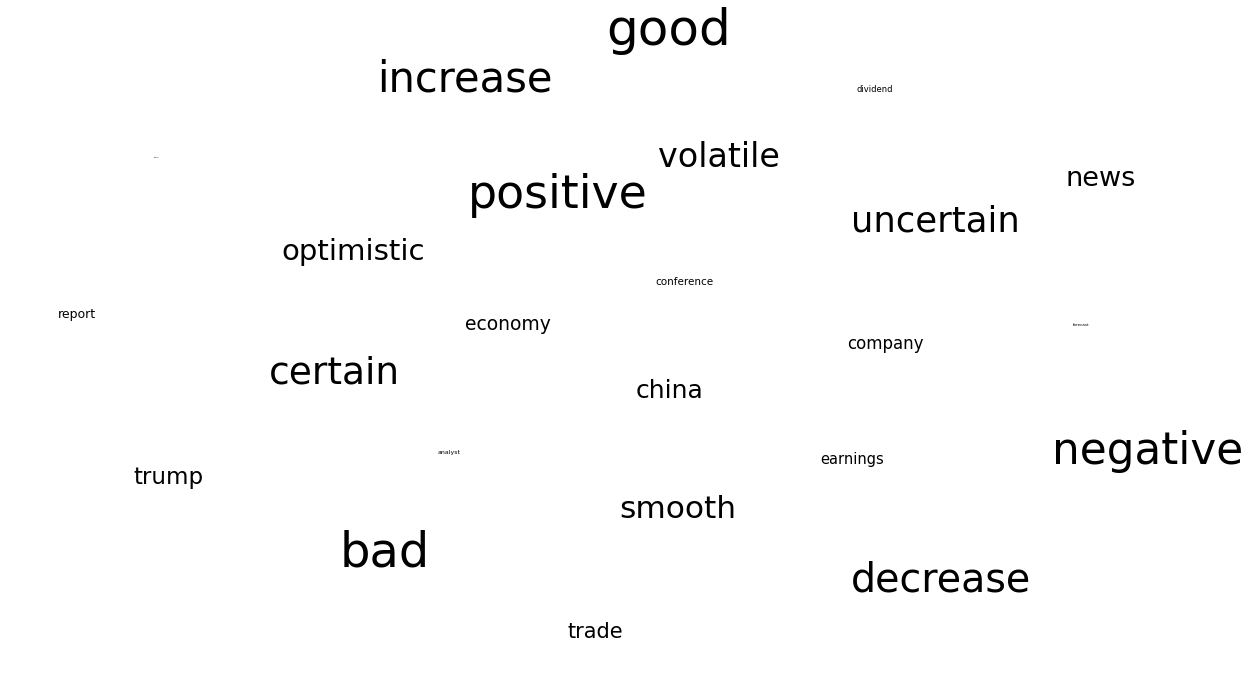

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNews[:, 0], tsneWordsNews[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(newsTargetWords):
    ax.annotate(word, (tsneWordsNews[:, 0][i],tsneWordsNews[:, 1][i]), size =  50 * (len(newsTargetWords) - i) / len(newsTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [ ]:
Positivity = dimension(newsWORD2Vec, ['positive','good','better','best','hopeful','dynamic','creative','helpful'], ['bad', 'negative', 'worse', 'worst', 'unfortunate','poor','poorest', 'downgrade', 'depreciation'])
Certainty = dimension(newsWORD2Vec, ['certain','trust','trust','believe', 'belief', 'sure','convince','definite','predictable'],['uncertain', 'volatile','unpredictable','concern','worry','trouble','skepticism'])


In [ ]:
Earnings = ["earnings","gain","profit","profitable","income", "revenue","yield","return","finance","fund", "money","interest","revenue"]

People = ["entrepreneur", "banker", "executive", "analyst", "manager", "director", "officer", "economist", "advisor", "agent"]

Actions  = ["merge", "acquisition", "financing", "upgrade", "downgrade", "offering", "bankruptcy", "investing", "borrowing", "lending"]

In [ ]:
def makeDF(model, word_list):
    p = []
    c = []
    for word in word_list:
        p.append(sklearn.metrics.pairwise.cosine_similarity(newsWORD2Vec[word].reshape(1,-1), Positivity.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(newsWORD2Vec[word].reshape(1,-1), Certainty.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'Positivity': p, 'Certainty': c}, index = word_list)
    return df

In [ ]:
Earningsdf = makeDF(newsWORD2Vec, Earnings) 
Peopledf = makeDF(newsWORD2Vec, People)
Actionsdf = makeDF(newsWORD2Vec, Actions)

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

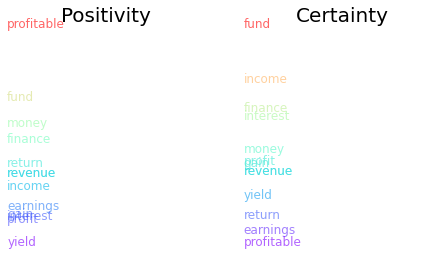

In [ ]:
# Plot the earnings words in each of the two dimensions.
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Earningsdf, 'Positivity')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Earningsdf, 'Certainty')
plt.show()

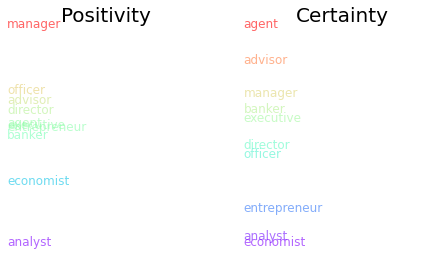

In [ ]:
# Plot the people words in each of the two dimensions.
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Peopledf, 'Positivity')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Peopledf, 'Certainty')
plt.show()

Manager turns out to be the most positive word, while analyst and economist is the least positive word and least certain word in financial news.

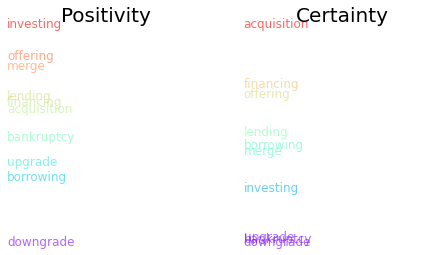

In [ ]:
# Plot the action words in each of the two dimensions.
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Actionsdf, 'Positivity')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Actionsdf, 'Certainty')
plt.show()

# The Score Function

The score function is a simple calculation developed by [Matt Taddy](https://arxiv.org/pdf/1504.07295.pdf) to calculate the likelihood that a given text would have been generated by a word-embedding model by summing the inner product between each pair of the text's word vectors. This relies on a few data files that are not in the git repo due to their size please download and unzip [this](https://github.com/Computational-Content-Analysis-2018/Upcoming/raw/master/data/supplement.zip) (472MB) file in the data directory.

Here, we explore this using a model trained with millions of resumes from the CareerBuilder website (we can't share the private resumes...but we can share a model built with them :-):

In [ ]:
resume_model  = gensim.models.word2vec.Word2Vec.load('../data/resumeAll.model')

We can examine the vacabularies of this model by building a word-index map:

In [ ]:
vocab = resume_model.wv.index2word

Let's just load the sample and take a look at it. The sentences in each job description are already tokenized and normalized.

In [ ]:
sampleDF = pandas.read_csv('../data/SampleJobAds.csv', index_col = False)
#We need to convert the last couple columns from strings to lists
sampleDF['tokenized_sents'] = sampleDF['tokenized_sents'].apply(lambda x: eval(x))
sampleDF['normalized_sents'] = sampleDF['normalized_sents'].apply(lambda x: eval(x))
sampleDF

,Unnamed: 0,hiringOrganization_organizationName,jobDescription,jobLocation_address_region,jobLocation_geo_latitude,jobLocation_geo_longitude,qualifications,responsibilities,tokenized_sents,normalized_sents
0,158844,"Golfsmith International, Inc.","""Sales Associate Tracking Code 220425-971 Job ...",California,33.91918,-118.41647,NaN,"""Ensure each Customer receives exceptional ser...","[[``, Sales, Associate, Tracking, Code, 220425...","[[sales, associate, tracking, code, job, descr..."
1,257645,Intel,For PHY system engineering team within the Wir...,NaN,NaN,NaN,NaN,NaN,"[[For, PHY, system, engineering, team, within,...","[[for, phy, system, engineering, team, within,..."
2,107875,Florida Hospital,*RN Medical Oncology PCU Orlando - Nights* Flo...,Florida,28.53834,-81.37924,NaN,NaN,"[[*RN, Medical, Oncology, PCU, Orlando, -, Nig...","[[medical, oncology, pcu, orlando, florida, ho..."
3,202394,Hitachi Data Systems,Title: Specialist Sales Account Representative...,NaN,NaN,NaN,NaN,NaN,"[[Title, :, Specialist, Sales, Account, Repres...","[[title, specialist, sales, account, represent..."
4,109675,Footprint Retail Services,**Footprint Retail Services** **Job Descriptio...,NaN,NaN,NaN,NaN,A Merchandiser must complete all assigned merc...,"[[**Footprint, Retail, Services**, **Job, Desc...","[[retail, job, title, retail, merchandiser, re..."
5,215973,Home Depot,Position Purpose: Provide outstanding service ...,Indiana,41.13060,-85.12886,NaN,Provide outstanding service to ensure efficien...,"[[Position, Purpose, :, Provide, outstanding, ...","[[position, purpose, provide, outstanding, ser..."
6,207524,Home Depot,The Asset Protection Specialist is primarily r...,New Jersey,40.21455,-74.61932,Must be eighteen years of age or older. Must p...,NaN,"[[The, Asset, Protection, Specialist, is, prim...","[[the, asset, protection, specialist, is, prim..."
7,64426,East West Bank,# Job Description East West Bank is one of the...,California,34.06862,-118.02757,NaN,We are currently seeking a Customer Service Ce...,"[[#, Job, Description, East, West, Bank, is, o...","[[job, description, east, west, bank, is, one,..."
8,245192,IBM,Job Description IBM is seeking to hire a Senio...,NaN,NaN,NaN,NaN,NaN,"[[Job, Description, IBM, is, seeking, to, hire...","[[job, description, ibm, is, seeking, to, hire..."
9,202429,Hitachi Data Systems,Title: Field Solutions Engineer Location: New ...,NaN,NaN,NaN,NaN,Job Functions;Specific duties in this role wil...,"[[Title, :, Field, Solutions, Engineer, Locati...","[[title, field, solutions, engineer, location,..."


Let's define a function to calculate the likelihood of each job description. The idea is borrowed from [Matt Taddy](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/deepir.ipynb), who shows how a document can be characterized as the inner product of the distance between its words. In other words, this analysis will show which job ads are most likely to find an appropriate pool of workers in the resume bank that generated our word embedding.  

In [ ]:
def adprob(ad, model):
    sen_scores = model.score(ad, len(ad))
    ad_score = sen_scores.mean()
    return ad_score

Let's apply this function to every job description.

In [ ]:
sampleDF['likelihood'] = sampleDF['normalized_sents'].apply(lambda x: adprob(x, resume_model))

Let's take a look at the top 5 job descriptions that have the highest likelihood.

In [ ]:
for ad in sampleDF.sort_values(by = 'likelihood', ascending = False)['jobDescription'][:5]:
    print (ad + '\n\n')

Project Engineering including below jobs: 1. Hardware designing of DCS 2. Software configurations, programming, testing of DCS/PLC 3. Testing and FAT 4. Installation and commissioning. 5. Material ordering, approvals of datasheets. 6. HSE compliance as per HSE directives of HON. BE / B. Tech - Instrumentation / Control / Electronics. **Job:** **Engineering* **Title:** *Systems Engineer* **Location:** *IND-MH-Pune* **Requisition ID:** *00302235*


Like talking on the phone? Enjoy giving great customer service? Use those skills while working flexible,part time hours.


*# Positions:* 2 *Location:* US - UT - Orem *Category:* Engineering


Title: Respiratory Therapy, Intern Location: XX-XX-XX


Title: Position Opening at Illinois Wesleyan University Location: US-IL-Bloomington




Let's take a look at the bottom 5 job descriptions that have the lowest likelihood to be matched by the resumes.

In [ ]:
for ad in sampleDF.sort_values(by = 'likelihood')['jobDescription'][:5]:
    print (ad + '\n\n')

Title: Contract Svc Admin Location: United States\-Michigan\-Caledonia Other Locations: JOB SUMMARY: ESSENTIAL DUTIES AND RESPONSIBILITIES: _ Other duties may be assigned:_ Prepare GPO rebate data for upload into STARR system oEnsure accurate data loads oProcess data into required reports oEnsure that GPOs are paid accurately and timely Prepare Sales Tracing data for upload into STARR system oEnsure accurate data loads oProcess data into required reports Prepare Rebate data for upload into STARR system oEnsure accurate data loads oProcess data into required reports oEnsure that distributors are accurately taking rebates against open invoices Manage work flow throughout the sales contracting process Ensure compliance with contract policies and performance requirements Assist in the preparation of charts and sales reports and analytics for customers and Management oQuarterly Reports oSales Tracing Answers customers and internal sale/customer service staff questions regarding pricing Mana

We can do the same for phrases corresponding to job skills.

In [ ]:
adprob([["python", "programming"]], resume_model)

-14.355247

In [ ]:
adprob([["julia", "programming"]], resume_model)

-33.427353

Basic programming appears to be more likely in this pool of resumes than python programming. 

We can also do some simple statistics. Unfortunately, we don't have a large sample here. Nevertheless, let's first look at the mean likelihood score of each hiring organization. Some organizations will do well to hire on CareerBuilder...while others will not.

In [ ]:
sampleDF.groupby("hiringOrganization_organizationName")[['likelihood']].mean().sort_values('likelihood', ascending = False)

,likelihood
hiringOrganization_organizationName,
Honeywell,-25.974749
Legrand North America,-40.500500
Franciscan St. Eilzabeth Health,-43.167206
Illinois Wesleyan University,-52.681591
Gold's Gym,-75.230896
Jewel-Osco,-80.965462
Ingersoll Rand,-81.494949
Kaiser Permanente,-85.523113
Hallmark Health,-86.037094


We can also look at the mean likelihood of each state.

In [ ]:
sampleDF.groupby("jobLocation_address_region")[['likelihood']].mean().sort_values('likelihood', ascending = False)

,likelihood
jobLocation_address_region,
Utah,-40.500500
Montana,-63.730721
Connecticut,-67.623466
Kansas,-85.259682
Tennessee,-93.188822
Illinois,-93.989101
New Hampshire,-94.109772
Georgia,-102.271820
South Carolina,-103.527328


You would increase the sample size if you want to do a more serious study.

## <font color="red">*Exercise 4a*</font>

<font color="red">**Do only 4a or 4b.** Construct cells immediately below this that calculate the scores for a small sample of documents from outside your corpus to identify which are *closest* to your corpus. Then calculate the scores for a few phrases or sentences to identify the ones most likely to have appeared in your corpus. Interrogate patterns associated with these document/phrase scores (e.g., which companies produced job ads most or least likely to find jobseekers in the resume corpus?) What do these patterns suggest about the boundaries of your corpus?

# Linguistic Change or Difference

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic chanage as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec [here](https://arxiv.org/pdf/1605.09096.pdf). 

In [ ]:
import copy

In [ ]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [ ]:
ascoDF = pandas.read_csv("../data/ASCO_abstracts.csv", index_col=0)

In order to explore this, let's get some data that follows a time trend. We'll look at conference proceedings from the American Society for Clinical Oncologists.

Prepare for wor2vec:

In [ ]:
ascoDF['tokenized_sents'] = ascoDF['Body'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
ascoDF['normalized_sents'] = ascoDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [ ]:
ascoDF

,Year,AbstractCategory,Title,FirstAuthor,Body,AbstractPublicationID,tokenized_sents,normalized_sents
0,1995,Lung Cancer,Treatment of non-small cell lung cancer with c...,GP Stathopoulos,Cisplatin compound is established as the main ...,1181,"[[Cisplatin, compound, is, established, as, th...","[[cisplatin, compound, establish, main, drug, ..."
1,1995,Breast Cancer,Treatment of primary breast cancer without mas...,A Bluming,"Between March 24, 1977, and March 24, 1983, 15...",270,"[[Between, March, 24, 1977, and, March, 24, 19...","[[march, march, woman, primary, breast, cancer..."
2,1995,Gynecologic Cancer,Treatment of relapsed ovarian carcinoma with e...,M Metzner,ECF has established activity and a high respon...,784,"[[ECF, has, established, activity, and, a, hig...","[[ecf, establish, activity, high, response, ra..."
3,1995,Lung Cancer,Treatment of small cell lung cancer (SCLC) wit...,JD Hainsworth,"In 7/93, we began investigation of a three-dru...",1197,"[[In, 7/93, we, began, investigation, of, a, t...","[[begin, investigation, drug, combination, pac..."
4,1995,Other Gastrointestinal Cancer,Vaccine-based (active specific) chemoimmunothe...,SH Itzkowitz,Active specific immunotherapy (ASI) is the adm...,549,"[[Active, specific, immunotherapy, ASI, is, th...","[[active, specific, immunotherapy, asi, admini..."
5,1995,Breast Cancer,Validation of a model that identifies high ris...,GM Clark,Breast cancer patients with 10 or more positiv...,69,"[[Breast, cancer, patients, with, 10, or, more...","[[breast, cancer, patient, positive, lymph, no..."
6,1995,Genitourinary Cancer,Validation of the PROSQOLI: a pragmatic outcom...,M Stockler,Rationale: Traditional outcome measures are un...,649,"[[Rationale], [Traditional, outcome, measures,...","[[rationale], [traditional, outcome, measure, ..."
7,1995,Preclinical Experimental Therapeutics - Other,'In vitro' comparative assay on fluorouracil (...,A Abad,The clinical experience with biochemical modul...,1609,"[[The, clinical, experience, with, biochemical...","[[clinical, experience, biochemical, modulatio..."
8,1995,Tumor Biology,'Medical cultural diversity' among medical onc...,R Hochman,Most MO rely on prospective randomized trials....,1633,"[[Most, MO, rely, on, prospective, randomized,...","[[mo, rely, prospective, randomize, trial], [o..."
9,1995,Developmental TherapeuticsÑClinical Pharmacolo...,13-cis-retinoic acid plus low dose recombinant...,GM Turola,Both interferons and retinoids are known to po...,709,"[[Both, interferons, and, retinoids, are, know...","[[interferon, retinoid, know, possess, antipro..."


We will be creating many embeddings so we have created this function to do most of the work. It creates two collections of embeddings, one the original and one the aligned.

In [ ]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [ ]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

Now we generate the models:

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(ascoDF, 'Year')

In [ ]:
rawEmbeddings.keys()

dict_keys([1995, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

Lets look at a couple words:

breast


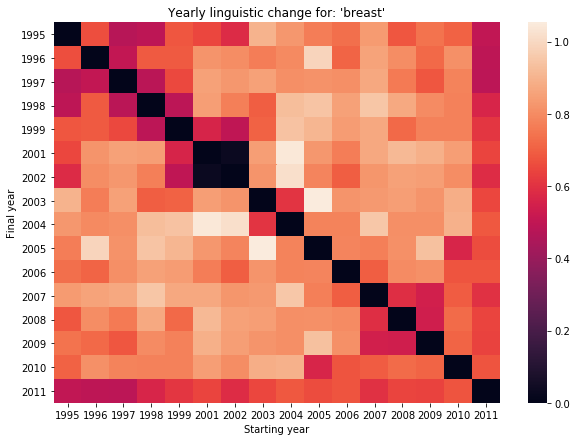

In [ ]:
targetWord = 'breast'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = 'combination'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 1571 words to compare


The most divergent words are:

In [ ]:
wordDivergences[:20]

[('t', 13.179612953215837),
 ('toxicity', 13.154180981218815),
 ('ml', 13.01737873442471),
 ('+', 12.853400095365942),
 ('activity', 12.749210256617516),
 ('infusion', 12.687976829707623),
 ('paclitaxel', 12.683675490319729),
 ('n', 12.662226218730211),
 ('great', 12.659880327060819),
 ('level', 12.559175675734878),
 ('x', 12.508285094052553),
 ('phase', 12.495868034660816),
 ('cisplatin', 12.456645250320435),
 ('combination', 12.417438723146915),
 ('c', 12.407136777415872),
 ('p', 12.399663124466315),
 ('efficacy', 12.373506214469671),
 ('csf', 12.333098318078555),
 ('show', 12.330282736569643),
 ('iv', 12.321207114960998)]

And the least:

In [ ]:
wordDivergences[-20:]

[('answer', 1.7252497673034668),
 ('device', 1.721915602684021),
 ('facilitate', 1.720019280910492),
 ('additionally', 1.685628592967987),
 ('particular', 1.6720524430274963),
 ('ensure', 1.6524746417999268),
 ('context', 1.650183618068695),
 ('definition', 1.6107643842697144),
 ('difficulty', 1.6012009978294373),
 ('discuss', 1.5829300284385681),
 ('call', 1.5171823501586914),
 ('traditional', 1.4596245288848877),
 ('nature', 1.44323068857193),
 ('constitute', 1.4302696585655212),
 ('simple', 1.410505771636963),
 ('practical', 1.3745331764221191),
 ('special', 1.294035017490387),
 ('uncertain', 1.2042807936668396),
 ('situation', 1.1920225620269775),
 ('view', 1.1317378878593445)]

t


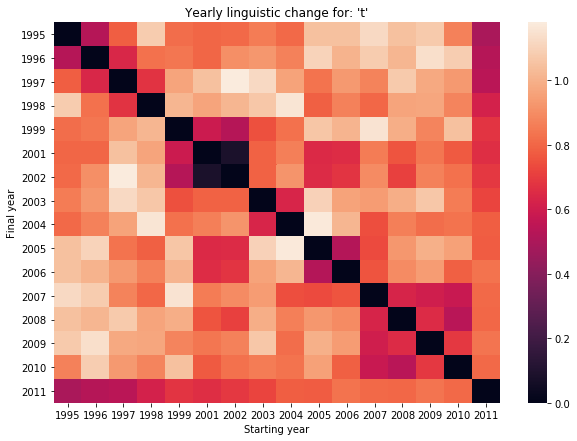

In [ ]:
targetWord = wordDivergences[0][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

## COHA

COHA is a historial dataset so it ends up being a good choice to try the same analysis we just did across three different time periods.

We will be using the same data loading procedure as the last notebook, so go through the process to make sure you know what's going on.

In [ ]:
corpora_address = "/Users/bhargavvader/Downloads/Academics_Tech/corpora/COHA"

In [ ]:
coha_texts = lucem_illud.loadDavies(corpora_address, return_raw=True)

text_1940s_bsw.zip
text_1920s_gte.zip
text_1900s_mse.zip
text_1810s_kso.zip
text_2000s_scc.zip
text_1910s_jue.zip
text_1890s_jsq.zip
text_1870s_vuy.zip
text_1840s_nsq.zip
text_1860s_psi.zip
text_1950s_ndz.zip
text_1820s_jsi.zip
text_1980s_bkk.zip
text_1930s_bie.zip
text_1960s_xus.zip
text_1990s_bsj.zip
text_1830s_bsu.zip
text_1850s_jpr.zip
text_1970s_jfy.zip
text_1880s_azz.zip


Cool - let us now create our different epochs. This is an important step: I will be using the same 5 epochs I did in the DTM example, but you are recommended to play around with this. I will create a dataframe which logs the year and the genre.

In [ ]:
coha_df = pandas.DataFrame(columns=["Year", "Genre", "Epoch", "normalized sents"])

In [ ]:
for article in coha_texts:
    genre, year, id_ = article.split("_")

    year = int(year)
    
    if year > 1810 and year < 1880:
        epoch = 0
    if year >= 1880 and year < 1913:
        epoch = 1
    if year >= 1913 and year < 1950:
        epoch = 2
    if year >= 1950 and year < 1990:
        epoch = 3
    if year >= 1990:
        epoch = 4
    
    try:
        if len(coha_texts[article][2]) < 1500000:
            coha_df.loc[id_] = [year, genre, epoch, lucem_illud.normalizeTokens(coha_texts[article][2].decode("utf-8"), lemma=False)]
    except TypeError:
        continue
    except IndexError:
        continue

We can now arrange our word embeddings by either year, genre, or epoch, and see how the words in each of those contexts change.

In [ ]:
rawEmbeddings_epoch = rawModels(coha_df, 'Epoch', text_column_name='normalized sents')

In [ ]:
# rawEmbeddings_genre = rawModels(coha_df, 'Genre', text_column_name='normalized sents')

We now have the raw embeddings for epoch and genre. You can test out the previous analysis on words of your choice.

In [ ]:
for epoch, embedding in enumerate(rawEmbeddings_epoch):
    model = rawEmbeddings_epoch[embedding]
    name = "embedding_epoch_" + str(epoch)
    model.save(name)

In [ ]:
# for embedding in rawEmbeddings_genre:
#     model = rawEmbeddings_genre[embedding]
#     name = "embedding_genre_" + embedding
#     model.save(name)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
def file_to_embeddings(address, kind):
    rawEmbeddings = {}
    for file in os.listdir(address):
        if "embedding_"+kind in file:
            e, kind_, kind_type = file.split("_")
            kind_type = eval(kind_type)
            rawEmbeddings[kind_type] = Word2Vec.load(file)
    return rawEmbeddings

In [ ]:
# rawEmbeddings_genre_load = file_to_embeddings(".", "genre")

In [ ]:
rawEmbeddings_epoch_load = file_to_embeddings(".", "epoch")

In [ ]:
rawEmbeddings_epoch_load.keys()

dict_keys([0, 1, 2, 3, 4])

In [ ]:
rawEmbeddings_epoch, compared_epoch = compareModels(coha_df, 'Epoch', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_epoch_load)

In [ ]:
# rawEmbeddings_genre, compared_genre = compareModels(coha_df, 'Genre', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_genre_load)

You now have access to the epoch wise embeddings, and the code to train models genre wise (commented out). You can use the original embeddings, the compared embeddings and such to perform the analysis we did before.

## <font color="red">*Exercise 4b*</font>

<font color="red">**Do only 4a or 4b.** Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space? 

There is much more we do not have time to cover on word embeddings. If you are interested in other ways to align word embeddings, take a look at the [Dynamic Word Embeddings (DTM) section from the Thinking with Deep Learning course](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=COS_n2RFCJNk) or using the more recent [Temporal Word Embeddings with a Compass (TWEC) package](https://github.com/valedica/twec). There is also a useful section on [debiasing word embeddings](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=JHQ--EsWoxGM), such as the famous, ["Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings"](https://arxiv.org/abs/1607.06520) paper. Below, we include an optional section on topic modeling with word embeddings, which could be useful for final projects.

In [ ]:
df_read = pandas.read_pickle("/content/drive/MyDrive/2020-04_all.pkl")
df_sample1 = df_read.sample(frac =.10)
#df_sample1 = df_read[:10000:10]

In [ ]:
#Apply our functions, notice each row is a list of lists now
df_sample1['tokenized_sents'] = df_sample1['Article'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
df_sample1['normalized_sents'] = df_sample1['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False, extra_stop=['|','$','+','=','sa','gmt']) for s in x])
#df_read['normalized_sents'] = df_read['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

df_sample1

In [ ]:
df_sample1

,Date,Company,Title,Article,System_GMT_Time,Display_ET_Time,Accession_Number,tokenized_sents,normalized_sents
60374,20200414,\nNIBE-B.SK\n,\nPress Release: Notice of Annual General Meeting,\n\n The shareholders of NIBE Industrier AB ...,20200414T070000.703Z,"April 14, 2020 03:00 ET (07:00 GMT)",20200414001209,"[[The, shareholders, of, NIBE, Industrier, AB,...","[[shareholders, nibe, industrier, ab, publ, in..."
121727,20200423,None,\nCME Live Cattle Delivery Intentions Total is...,\n\n \n\n (END) Dow Jones Newswires\n\n Apri...,20200423T202303.027Z,"April 23, 2020 16:23 ET (20:23 GMT)",20200423014774,"[[END, Dow, Jones, Newswires, April, 23, 2020]...","[[end, dow, jones, newswires, april], [16:23, ..."
104818,20200422,None,\nNews Highlights: Top Global Markets News of ...,\n\n \nGlobal Markets Steadier After Two Days ...,20200422T050010.925Z,"April 22, 2020 01:00 ET (05:00 GMT)",20200422000201,"[[Global, Markets, Steadier], [After, Two, Day...","[[global, markets, steadier], [days, oil, driv..."
123611,20200424,\n012330.SE\n,\nHyundai Mobis 1Q Rev KRW8.423T Vs KRW8.738T,\n\n \n \n\n (MORE TO FOLLOW) Dow Jones Newsw...,20200424T050914.287Z,"April 24, 2020 01:09 ET (05:09 GMT)",20200424000386,"[[MORE, TO, FOLLOW], [Dow, Jones, Newswires, A...","[[follow], [dow, jones, newswires, april], [01..."
75540,20200416,\nCARR\n,\nPress Release: New Carrier OptiClean(TM) Neg...,\n\n New Carrier OptiClean(TM) Negative Air M...,20200416T120003.821Z,"April 16, 2020 08:00 ET (12:00 GMT)",20200416004939,"[[New, Carrier, OptiClean(TM], [Negative, Air,...","[[new, carrier, opticlean(tm], [negative, air,..."
...,...,...,...,...,...,...,...,...,...
129856,20200424,\nICE\n,\nNYSE Short Interest 13.97 Billion as of Apri...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200424T212254.030Z,"April 24, 2020 17:22 ET (21:22 GMT)",20200424012703,"[[MORE, TO, FOLLOW], [Dow, Jones, Newswires, 2...","[[follow], [dow, jones, newswires, april, 17:2..."
84490,20200417,None,\nEuronext Closing Wheat Futures - Apr 17,\n\nSource: Euronext \n \nParis-based milling ...,20200417T172009.669Z,"April 17, 2020 13:20 ET (17:20 GMT)",20200417008511,"[[Source], [Euronext, Paris, based, milling, w...","[[source], [euronext, paris, based, milling, w..."
74375,20200416,None,\nChina PBOC: Long-Term Lending for Infrastruc...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200416T091436.754Z,"April 16, 2020 05:14 ET (09:14 GMT)",20200416002816,"[[MORE, TO, FOLLOW], [Dow, Jones, Newswires, A...","[[follow], [dow, jones, newswires, april], [05..."
35261,20200407,\nSAGE\n,\nSage Therapeutics: Resulting Savings Compris...,\n\n \n\n (MORE TO FOLLOW) Dow Jones Newswire...,20200407T200256.971Z,"April 07, 2020 16:02 ET (20:02 GMT)",20200407009791,"[[MORE, TO, FOLLOW], [Dow, Jones, Newswires, 2...","[[follow], [dow, jones, newswires, april, 16:0..."


In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(df_sample1, 'Date')

In [ ]:
rawEmbeddings.keys()

dict_keys(['20200401', '20200402', '20200403', '20200404', '20200405', '20200406', '20200407', '20200408', '20200409', '20200410', '20200411', '20200412', '20200413', '20200414', '20200415', '20200416', '20200417', '20200418', '20200419', '20200420', '20200421', '20200422', '20200423', '20200424', '20200425', '20200426', '20200427', '20200428', '20200429', '20200430'])

company


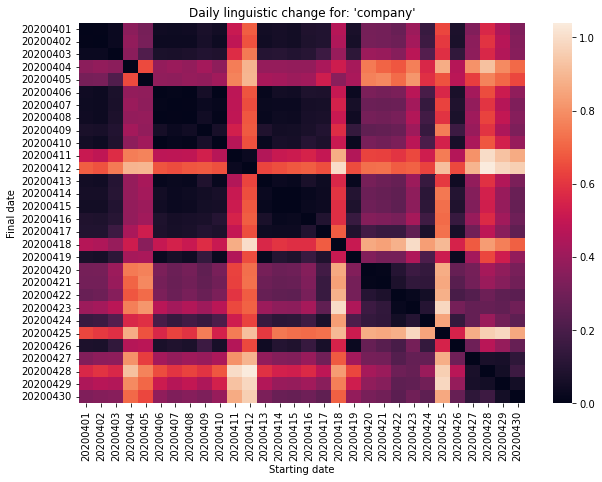

In [ ]:
targetWord = 'company'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting date")
ax.set_ylabel("Final date")
ax.set_ylabel("Final date")
ax.set_title("Daily linguistic change for: '{}'".format(targetWord))
plt.show()

price


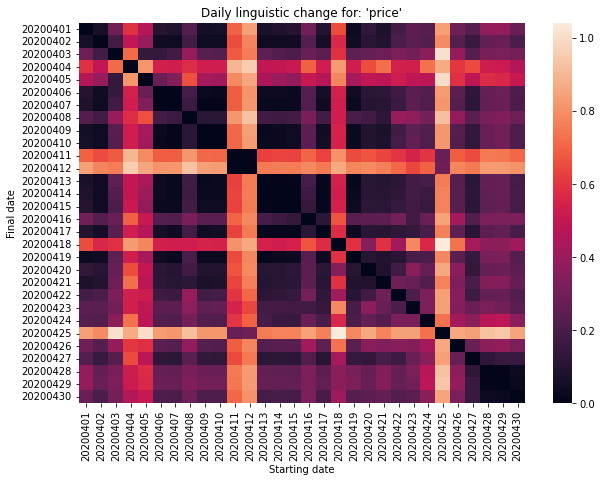

In [ ]:
targetWord = 'price'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting date")
ax.set_ylabel("Final date")
ax.set_ylabel("Final date")
ax.set_title("Daily linguistic change for: '{}'".format(targetWord))
plt.show()

business


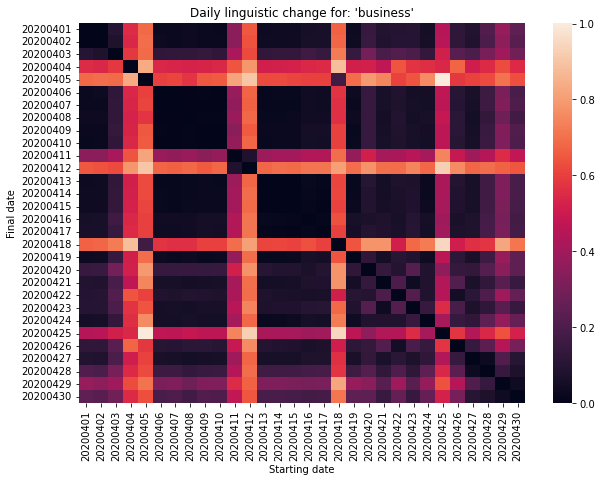

In [ ]:
targetWord = 'business'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting date")
ax.set_ylabel("Final date")
ax.set_ylabel("Final date")
ax.set_title("Daily linguistic change for: '{}'".format(targetWord))
plt.show()

This suggests that documents whose dates are close to each other demonstrates smaller linguistic changes for the same target word.

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 22 words to compare


In [ ]:
wordDivergences

[('share', 8.54095746576786),
 ('year', 8.294242069125175),
 ('price', 8.114052280783653),
 ('end', 7.562844157218933),
 ('jones', 6.981946669518948),
 ('company', 6.90075096487999),
 ('newswires', 6.883389726281166),
 ('dow', 6.870648816227913),
 ('et', 6.190096043050289),
 ('april', 5.738448441028595),
 ('new', 5.534434512257576),
 ('business', 5.3996222615242),
 ('pandemic', 5.043962374329567),
 ('says', 4.951899580657482),
 ('production', 4.770423606038094),
 ('market', 4.609982788562775),
 ('demand', 4.398219078779221),
 ('coronavirus', 4.333737105131149),
 ('week', 4.174632713198662),
 ('said', 4.1189915984869),
 ('government', 3.8390850871801376),
 ('u.s', 3.58806973695755)]

share


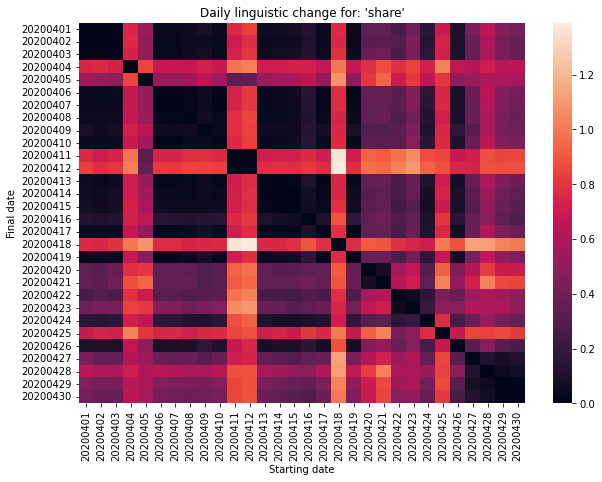

In [ ]:
targetWord = wordDivergences[0][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting date")
ax.set_ylabel("Final date")
ax.set_ylabel("Final date")
ax.set_title("Daily linguistic change for: '{}'".format(targetWord))
plt.show()

u.s


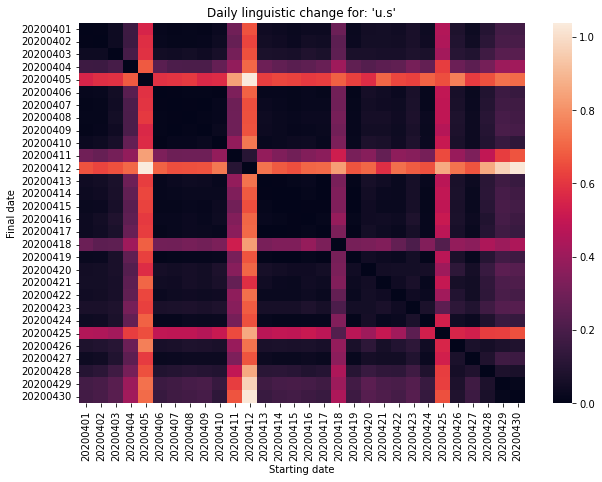

In [ ]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting date")
ax.set_ylabel("Final date")
ax.set_ylabel("Final date")
ax.set_title("Daily linguistic change for: '{}'".format(targetWord))
plt.show()

## Optional: Topic modeling with word embeddings

Recently computer scientists have developed methods to cluster word embeddings, which can be viewed as a topic model, an embedding-based version of conventional topic models that use the document-term matrix (e.g., LDA). One method is Discourse Atoms, first described by Princeton NLP researchers ([Arora et al. 2018](https://arxiv.org/abs/1601.03764)). This uses k-SVD, a generalization of the k-means clustering algorithm to identify topic-like vectors in the n-dimensional word embedding space. Below is code adapted from the first social science paper using Discourse Atoms, [Arseniev-Koehler et al. 2021](https://osf.io/preprints/socarxiv/nkyaq/). It takes as input _gensim_ word vectors.

You are not required to implement this, but for class projects or your own research, this can be more useful than conventional topic models. It runs faster, produces more detailed topics, and in general makes use of more information (i.e., word order within a document) than do conventional topic models. Note there are at least 4 other papers with methods for word embedding clusters:

- Xun, Li, Zhao, Gao, and Zhang 2017: [multivariate Gaussian distributions](https://www.ijcai.org/proceedings/2017/588)
- Dieng, Ruiz, and Blei 2019: ["Embedding Topic Model (ETM)"](https://arxiv.org/abs/1907.04907)
- Angelov 2020: ["Top2Vec"](https://arxiv.org/abs/2008.09470)
- Sia, Dalmia, and Mielke 2020: [(spherical) k-means, k-medoids, von Mises-Fisher Models, Gaussian Mixture Models](https://arxiv.org/abs/2004.14914)

Let's implement the Discourse Atoms method.

In [ ]:
# from gensim.test.utils import datapath 
# import re
# import string, re
# import cython

In [ ]:
# The ksvd package has a convenient Approximate k-SVD function.
!pip install ksvd

In [ ]:
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from random import seed, sample
from ksvd import ApproximateKSVD #pip or conda install ksvd #this is key!

In [ ]:
import pickle

In [ ]:
import math

In [ ]:
# Load a gensim word2vec model
w2v = senReleasesW2V

#### k-SVD

We then perform a K-SVD on the word embedding matrix to learn topics in such a way where each word-vector is represented as a spare linear combination of topics. To generate a good representation of the original word vector space, we want to minimize the difference between our word vectors and the vectors generated as a linear combination of topics. 




In [ ]:
#### TRAIN MODEL:

#n_comp: Number of topics (i.e., atoms, or dictionary elements)
#n_nonzeros: Number of nonzero coefficients to target (how many atoms each word can load onto)
            
def do_aksvd(w2vmodel, n_comp, n_nonzeros, save=False, savelocation='/content/aksvd_models/'): 
    #https://github.com/nel215/ksvd #takes about 2 min on Alina's laptop for 30 atoms 
    aksvd_t = ApproximateKSVD(n_components=n_comp, transform_n_nonzero_coefs=n_nonzeros) #also may adjuste n iter which is default at 10, and tolerance for error which is default at  tol=1e-6 #n_components is number of discourse atoms, since vocab size is smallish, keep this fewer. transform_n is the number of atoms (components) that a word can be a linear combo of
    dictionary_t = aksvd_t.fit(w2vmodel.wv.vectors).components_ # Dictionary is the matrix of discourse atoms. 
    alpha_t = aksvd_t.transform(w2vmodel.wv.vectors) #get the alphas, which are the "weights" of each word on a discourse atoms

    if save==True:
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_aksvd_nvdrsdf20','wb')
        pickle.dump(aksvd_t,outfile)
        outfile.close()
        
        outfile = open(str(savelocation) + '200d_' +str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_dictionary_nvdrsdf20','wb')
        pickle.dump(dictionary_t,outfile)
        outfile.close()
        
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_alpha_nvdrsdf20','wb')
        pickle.dump(alpha_t,outfile)
        outfile.close()
    return(dictionary_t, alpha_t)

Two quick quality checks. These are useful to choose the number of atoms in the dictionary (i.e., number of topics): $R^2$ and Topic Diversity

Useful to look at product of the two since $R^2$ tends to increase with higher # topics, as Topic Diversity decreases. Intuition: more topics can better explain the original semantic space, but also then these topics are less distinct from one another. As a result, we typically want a balance between the two.

In [ ]:
def reconst_qual(w2vmodel, dictionary_mat, alpha_mat):
    #reconstruct the word vectors
    reconstructed = alpha_mat.dot(dictionary_mat) #reconstruct word vectors and add back in mean(?). but note that reconstructed norm is still around 0-1, not 1, is that an issue?
    #e1 = norm(w2vmodel.wv.vectors - reconstructed) #total reconstruction error, larger means MORE error. norm as specified here takes frobenius norm of error matrix.


    #total VARIANCE in the data: sum of squares 
    squares3= w2vmodel.wv.vectors-np.mean(w2vmodel.wv.vectors, axis=1).reshape(-1,1) #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sst3= np.sum([i.dot(i) for i in squares3] ) #same as below

    sst3= np.sum(np.square(squares3))


    #total sum of squared ERRORS/residuals
    e3= [reconstructed[i]-w2vmodel.wv.vectors[i] for i in range(0,len(w2vmodel.wv.vectors))]  #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sse3= np.sum([i.dot(i) for i in e3] ) #same as below
    sse3= np.sum(np.square(e3))

    #R^2: 1- (SSE / SST )
    r2= 1- (sse3 /  sst3) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error


    #compute root mean square error
    rmse=  math.sqrt(np.mean(np.square(e3)))



    return(sse3, rmse, r2) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

#### Inferring topics from document

We now use a similar approach to what we saw a little earlier, where we inverted our generative model to see which documents belong to which class - we do the same now, but with discourse atoms instead of the whole model. This process tells us the topic most likely to have generated a specific context (document). 



In [ ]:
#topic diversity (% unique words among total closest 25 words to each atom)
def topic_diversity(w2vmodel, dictionary_mat, top_n=25):

    topwords=[] #list of list, each innter list includes top N words in that topic

    for i in range(0, len(dictionary_mat)): #set to number of total topics
        topwords.extend([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary_mat[i],topn=top_n)]) #set for top N words 
        #print(w2vmodel.wv.similar_by_vector(dictionary[i],topn=N))

    uniquewords= set(topwords)
    diversity = len(uniquewords)/len(topwords)
    return(diversity)

In [ ]:
dictionary, alpha = do_aksvd(w2v, 150, 5, save=True)

In [ ]:
topic_diversity(w2v, dictionary, top_n=25)

0.8885333333333333

In [ ]:
reconst_qual(w2v, dictionary, alpha)


(2398540.8915694184, 0.894244689800385, 0.4193311633201203)

In [ ]:
#loading back in the model pieces if not already in

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_dictionary_nvdrsdf20','rb')
# dictionary=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_aksvd_nvdrsdf20','rb')
# aksvd=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_alpha_nvdrsdf20','rb')
# alpha=pickle.load(infile)
# infile.close()

In [ ]:
for i in range(0, len(dictionary)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in w2v.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')


Discourse_Atom 0
['Egypts', 'Morsi', 'Morsi,', 'Morsis', 'Mubarak', 'Brotherhood', 'Egypt', 'Egyptian', 'ouster', 'coup', 'Islamist', 'Mohamed', 'Islamists', 'Egypt,', 'Cairo', 'generals', 'democratic', 'democracy.', 'ousted', 'legitimacy', 'Mahmoud', 'democracy', 'democracy,', 'Spring', 'Abdullah']


Discourse_Atom 1
['Derby', 'Triple', 'Belmont', 'Premier', 'Champions', 'Manchester', 'Crown', 'horse', 'League', 'winner,', 'horses', 'Real', 'Yankees', 'Yankees,', 'league', 'team', 'trainer', 'season', 'club', 'Chelsea', 'teams', 'Cup', 'Soccer', 'clubs', 'winning']


Discourse_Atom 2
['Brazil', 'Brazil,', 'Cup,', 'Cup', 'Germany', 'States,', 'countries', 'Cup.', 'Europe', 'Europe,', 'United', 'Portugal', 'countries,', 'nations,', 'Sweden', 'Argentina', 'Netherlands', 'World', 'Australia', 'Canada', 'Japan,', 'Africa', 'Germany,', 'States', 'Italy']


Discourse_Atom 3
['happened', 'moment', 'tragedy', 'story', 'happened.', 'tragic', 'nature', 'happened,', 'moments', 'truth', 'what', 'n

In [ ]:
# for a specific atom, e.g., 112th atom look at 25 most similar words:
w2v.wv.similar_by_vector(dictionary[112],topn=25)

[('court', 0.7905327081680298),
 ('judge', 0.7822369337081909),
 ('Court', 0.7414460182189941),
 ('courts', 0.7331409454345703),
 ('judges', 0.7240278124809265),
 ('Supreme', 0.7147840261459351),
 ('ruling', 0.711248517036438),
 ('case', 0.7036005854606628),
 ('appeals', 0.6984674334526062),
 ('Judge', 0.6953557729721069),
 ('lawyers', 0.681331992149353),
 ('ruling,', 0.6630173921585083),
 ('judge,', 0.6567955613136292),
 ('court,', 0.6532109975814819),
 ('plaintiffs', 0.6437978148460388),
 ('justices', 0.6303653717041016),
 ('legal', 0.6270549297332764),
 ('case,', 0.6229175329208374),
 ('ruling.', 0.6145539879798889),
 ('Court,', 0.6115553379058838),
 ('Circuit', 0.6098675727844238),
 ('court.', 0.6063867211341858),
 ('case.', 0.6011309623718262),
 ('trial', 0.5913736820220947),
 ('Justice', 0.5887668132781982)]

In [ ]:
print(w2v.wv.vocab.get('the').index, '\n', alpha[w2vmodel.wv.vocab.get('the').index])



1 
 [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00273484 -0.00186215  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00216819  0.          0.          0.          0.
  0.         -0.002954    0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.     

In [ ]:
#useful relevant code:
#w2vmodel.wv.index2word[3452]
#w2vmodel.wv.most_similar('the', topn=15)
#np.where(alpha[w2vmodel.wv.vocab.get('the').index] != 0) #get index where the loading of a word onto discourse atoms is not 0